In [73]:
using DataFrames, wgregseq, CSV, CairoMakie

#CairoMakie.activate!()

wgregseq.viz.plotting_style()

2-element Vector{Any}:
 Dict("light_blue" => "#5fa6db", "light_red" => "#e89290", "primary_blue" => "#3373ba", "green" => "#488d48", "pale_red" => "#eeb3b0", "light_green" => "#99d097", "primary_green" => "#5cb75b", "light_black" => "#8c8c8c", "gold" => "#b1843e", "pale_blue" => "#8ec1e8"…)
 ["#4c4b4c", "#3373ba", "#5cb75b", "#8066ad", "#f0ad4d", "#d8534f"]

# Round 1

In [74]:
df = CSV.read("../../data/bioanalyzer/17-22-35/2023 12 12 17H 22M Peak Table.csv", DataFrame)

561×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  ⋯
     │ String3  String7    Int64    Int64      Union{Missing, Float64}         ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ A1       SampA1           1          1                       missing    ⋯
   2 │ A1       SampA1           2         34                            60.9
   3 │ A1       SampA1           3         49                            39.1
   4 │ A1       SampA1           4       6000                       missing   
   5 │ A2       SampA2           1          1                       missing    ⋯
   6 │ A2       SampA2           2         34                            63.0
   7 │ A2       SampA2           3         49                            37.0
   8 │ A2       SampA2           4       6000                       missing   
  ⋮  │    ⋮         ⋮         ⋮         ⋮                    ⋮                 ⋱
 555 │ H12      SampH12         10        900                             5.5  ⋯
 556 │ H12      SampH12         11       1000                            15.9
 557 │ H12      SampH12         12       1200                             5.3
 558 │ H12      SampH12         13       1500                             5.7
 559 │ H12      SampH12         14       2000                             5.9  ⋯
 560 │ H12      SampH12         15       3000                             5.8
 561 │ H12      SampH12         16       6000                       missing   
                                                  9 columns and 546 rows omitted

In [75]:
primer_dict = Dict()
sample_dict = Dict()
cycle_dict = Dict()
for i in 1:12
    for j in ["A", "B", "C", "D", "E", "F", "G", "H"]
        well = "$j$i"
        if (i<=8) && (j in ["A", "B", "C", "D"])
            cycles = 15
        elseif (i<=8) && (j in ["E", "F", "G", "H"])
            cycles = 25
        else
            cycles = 35
        end
        if i == 1
            sample = "N1"
        elseif i == 2
            sample = "N2"
        elseif i == 3
            sample = "LacI-1"
        elseif i == 4
            sample = "LacI-2"
        elseif i == 5
            sample = "LacI-3"
        elseif i == 6
            sample = "CRP-1"
        elseif i == 7
            sample = "CRP-2"
        elseif i == 8
            sample = "CRP-3"
        elseif j == "A"
            sample = "N1"
        elseif j == "B"
            sample = "N2"
        elseif j == "C"
            sample = "LacI-1"
        elseif j == "D"
            sample = "LacI-2"
        elseif j == "E"
            sample = "LacI-3"
        elseif j == "F"
            sample = "CRP-1"
        elseif j == "G"
            sample = "CRP-2"
        elseif j == "H"
            sample = "CRP-3"
        end
        if i == 9
            primer = "All"
        elseif i == 10
            primer = "OmpR"
        elseif i == 11
            primer = "CRP"
        elseif i == 12
            primer = "lacI"
        elseif j == "A" || j =="E" 
            primer = "lacI"
        elseif j == "B" || j =="F"
            primer = "CPR"
        elseif j == "C" || j =="G"
            primer = "OmpR"
        elseif j == "D" || j =="H"
            primer = "All"
        end
        primer_dict[well] = primer
        sample_dict[well] = sample
        cycle_dict[well] = cycles
        println(i, ", ", j, ", ", sample, ", ", primer)
    end
end

1, A, N1, lacI
1, B, N1, CPR
1, C, N1, OmpR
1, D, N1, All
1, E, N1, lacI
1, F, N1, CPR
1, G, N1, OmpR
1, H, N1, All
2, A, N2, lacI
2, B, N2, CPR
2, C, N2, OmpR
2, D, N2, All
2, E, N2, lacI
2, F, N2, CPR
2, G, N2, OmpR
2, H, N2, All
3, A, LacI-1, lacI
3, B, LacI-1, CPR
3, C, LacI-1, OmpR
3, D, LacI-1, All
3, E, LacI-1, lacI
3, F, LacI-1, CPR
3, G, LacI-1, OmpR
3, H, LacI-1, All
4, A, LacI-2, lacI
4, B, LacI-2, CPR
4, C, LacI-2, OmpR
4, D, LacI-2, All
4, E, LacI-2, lacI
4, F, LacI-2, CPR
4, G, LacI-2, OmpR
4, H, LacI-2, All
5, A, LacI-3, lacI
5, B, LacI-3, CPR
5, C, LacI-3, OmpR
5, D, LacI-3, All
5, E, LacI-3, lacI
5, F, LacI-3, CPR
5, G, LacI-3, OmpR
5, H, LacI-3, All
6, A, CRP-1, lacI
6, B, CRP-1, CPR
6, C, CRP-1, OmpR
6, D, CRP-1, All
6, E, CRP-1, lacI
6, F, CRP-1, CPR
6, G, CRP-1, OmpR
6, H, CRP-1, All
7, A, CRP-2, lacI
7, B, CRP-2, CPR
7, C, CRP-2, OmpR
7, D, CRP-2, All
7, E, CRP-2, lacI
7, F, CRP-2, CPR
7, G, CRP-2, OmpR
7, H, CRP-2, All
8, A, CRP-3, lacI
8, B, CRP-3, CPR
8, C, CRP

In [76]:
gdf = groupby(df, :Well)

lacI_range = (119, 122)
OmpR_range = (129, 132)
CRP_range = (202, 205)

for _df in gdf
    well = _df.Well[1] 
    if (primer_dict[_df.Well[1]] == "All") && (cycle_dict[_df.Well[1]] == 25)
        lacI_peaks = _df[lacI_range[1] .<= _df[!, "Size (bp)"] .<= lacI_range[2], :]
        ompR_peaks = _df[OmpR_range[1] .<= _df[!, "Size (bp)"] .<= OmpR_range[2], :]
        CRP_peaks = _df[CRP_range[1] .<= _df[!, "Size (bp)"] .<= CRP_range[2], :]
        println(sample_dict[_df.Well[1]])
        if (length(lacI_peaks[!, "nmole/L"]) > 0) && (length(ompR_peaks[!, "nmole/L"]) > 0)
            println("LacI/OmpR: ", lacI_peaks[!, "nmole/L"] ./ ompR_peaks[!, "nmole/L"])
        end
        if (length(CRP_peaks[!, "nmole/L"]) > 0) && (length(ompR_peaks[!, "nmole/L"]) > 0)
            println("CRP/OmpR: ", CRP_peaks[!, "nmole/L"] ./ ompR_peaks[!, "nmole/L"])
        end
        println("LacI: ", lacI_peaks[!, "nmole/L"])
        println("CRP: ", CRP_peaks[!, "nmole/L"])
        println()
    end
end

N1
LacI/OmpR: [1.6061306607939725]
CRP/OmpR: [1.9547805722038143]
LacI: [2577.5278]
CRP: [3137.0432]

N2
LacI/OmpR: [1.52044505225655]
CRP/OmpR: [1.9300860678145317]
LacI: [2239.4585]
CRP: [2842.8174]

LacI-1
LacI/OmpR: [2.135309832713896]
CRP/OmpR: [2.010394482826763]
LacI: [2247.5588]
CRP: [2116.0769]

LacI-2
LacI/OmpR: [2.090654961855663]
CRP/OmpR: [1.9034367761577893]
LacI: [1852.7378]
CRP: [1686.8251]

LacI-3
LacI/OmpR: [1.8877189865943884]
CRP/OmpR: [1.8935577771152492]
LacI: [2067.9331]
CRP: [2074.3293]

CRP-1
LacI/OmpR: [1.6304680876420306]
CRP/OmpR: [1.4042777359037593]
LacI: [1871.5941]
CRP: [1611.953]

CRP-2
LacI/OmpR: [1.8803701878806267]
CRP/OmpR: [1.430617094140274]
LacI: [1414.3163]
CRP: [1076.0355]

CRP-3
LacI/OmpR: [1.8515230794279616]
CRP/OmpR: [1.2787541272727239]
LacI: [981.3837]
CRP: [677.7925]



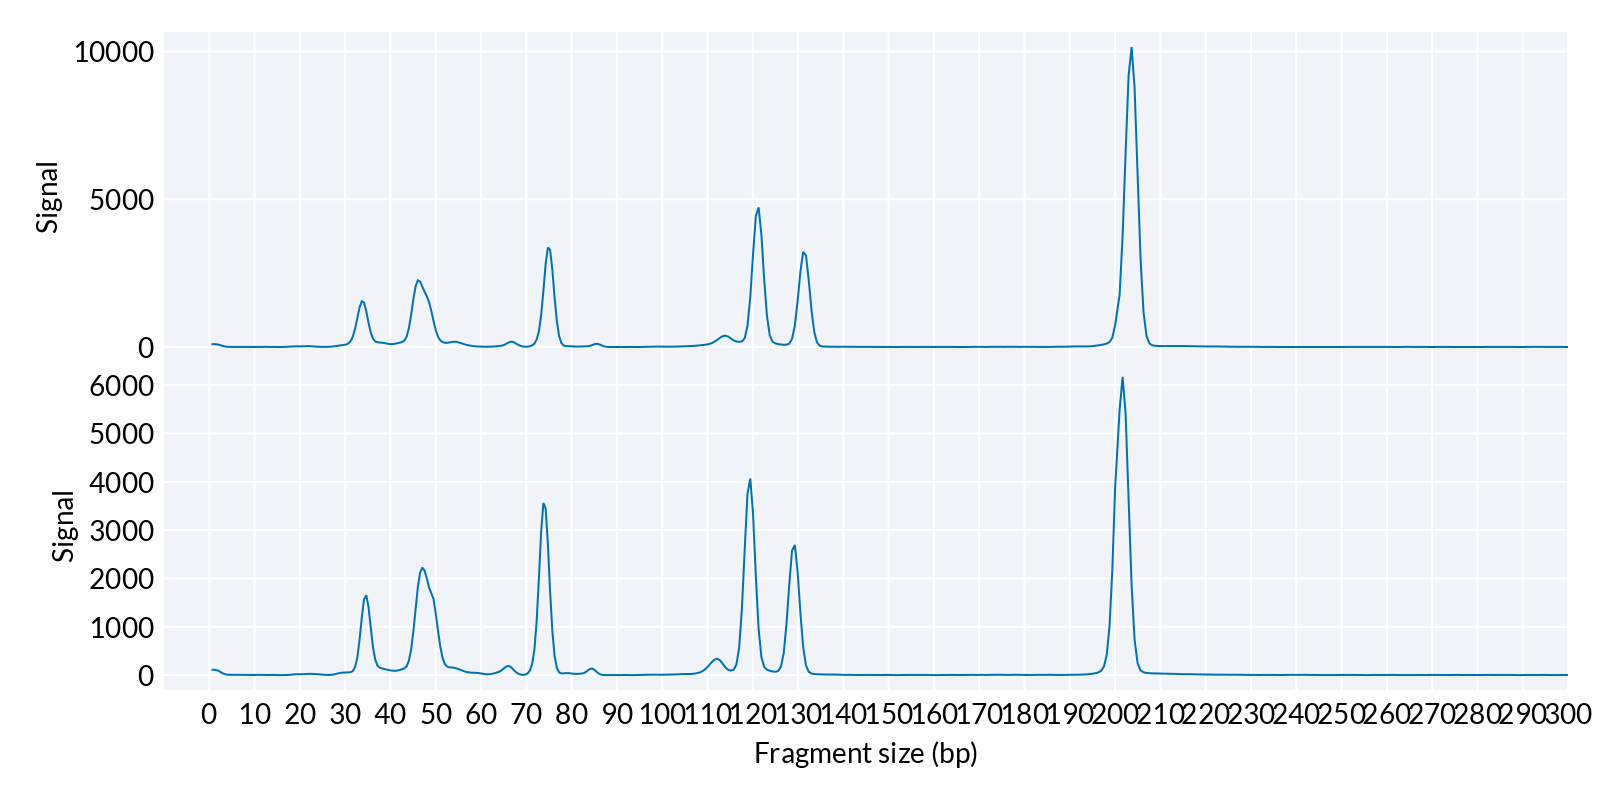

In [77]:
df_traces = CSV.read("../../data/bioanalyzer/17-22-35/2023 12 12 17H 22M Electropherogram.csv", DataFrame)

fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)")

lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "H1: SampH1"])
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "H6: SampH6"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
rowgap!(g0, 0)
fig

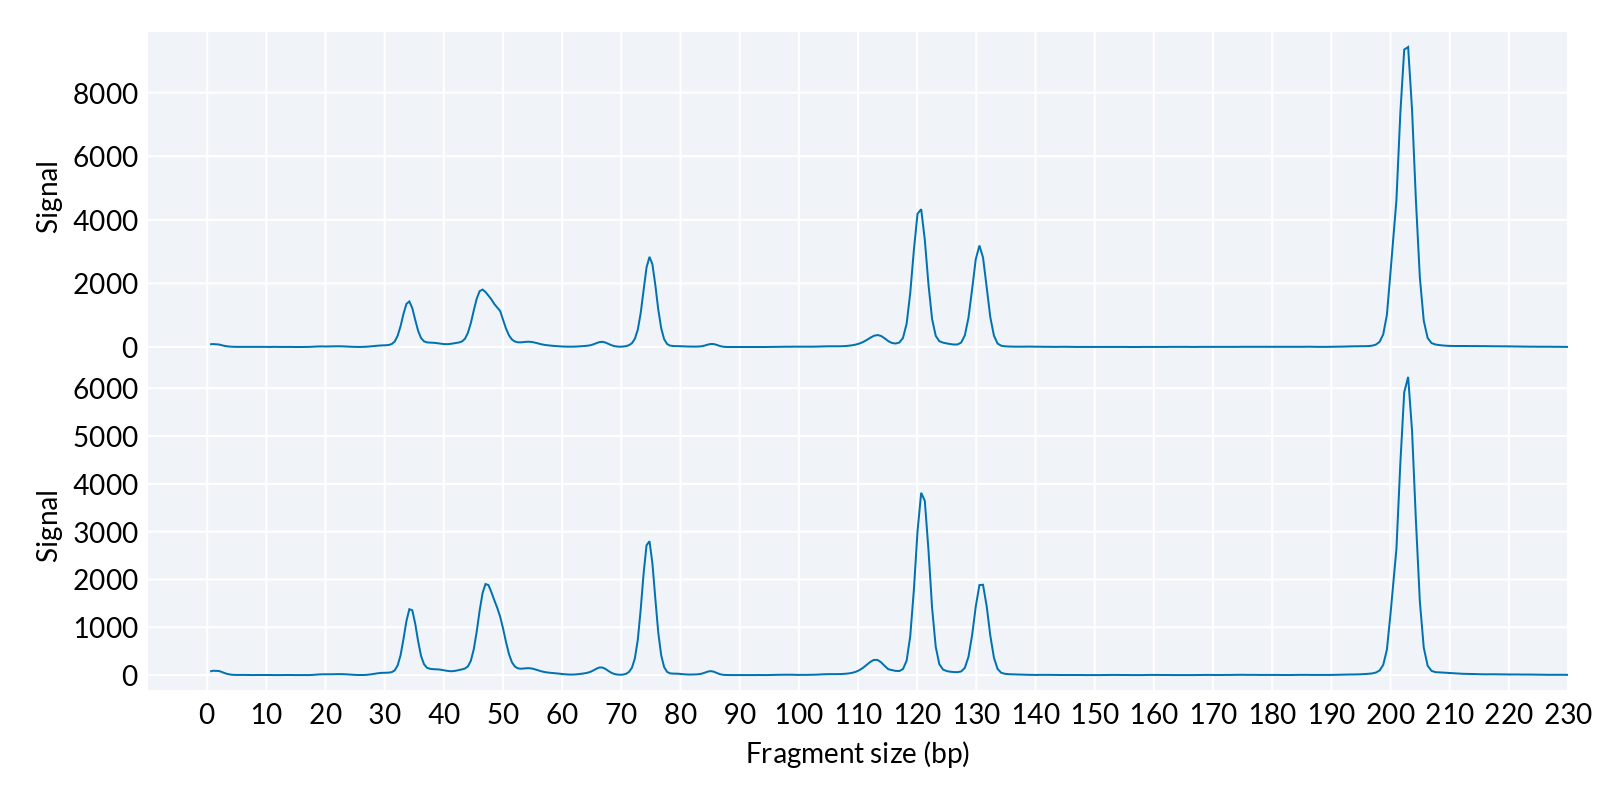

In [78]:
df_traces = CSV.read("../../data/bioanalyzer/17-22-35/2023 12 12 17H 22M Electropherogram.csv", DataFrame)

fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)")

lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "H2: SampH2"])
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "H3: SampH3"])

xlims!(ax1, -10, 230)
xlims!(ax2, -10, 230)
rowgap!(g0, 0)

save("lacI-1_enrichment_25cycles.pdf", fig)
fig

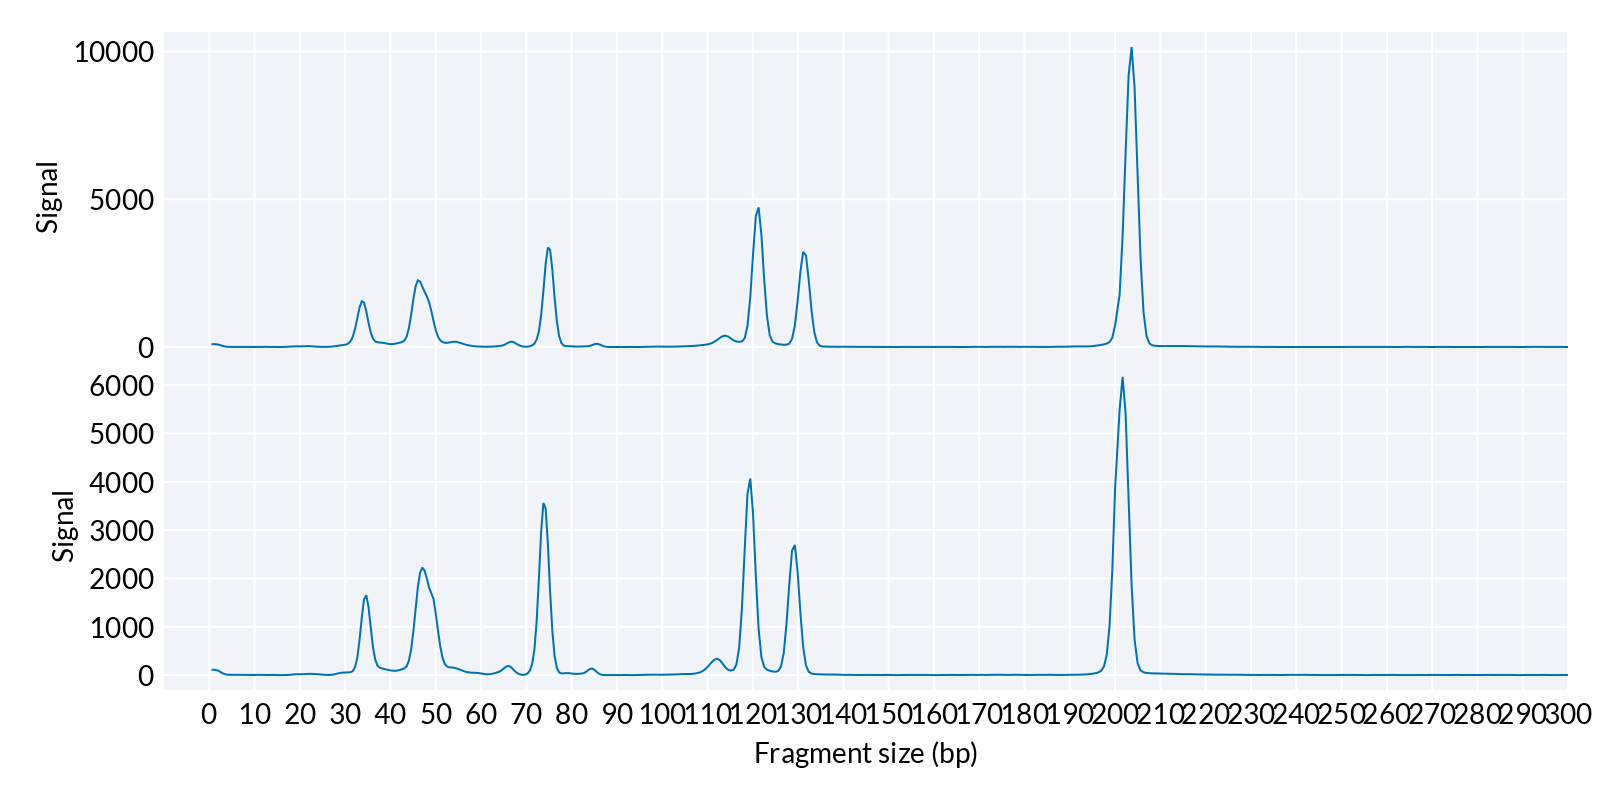

In [79]:
df_traces = CSV.read("../../data/bioanalyzer/17-22-35/2023 12 12 17H 22M Electropherogram.csv", DataFrame)

fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)")

lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "H1: SampH1"])
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "H6: SampH6"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
rowgap!(g0, 0)
save("CRP-1_enrichment_25cycles.pdf", fig)
fig

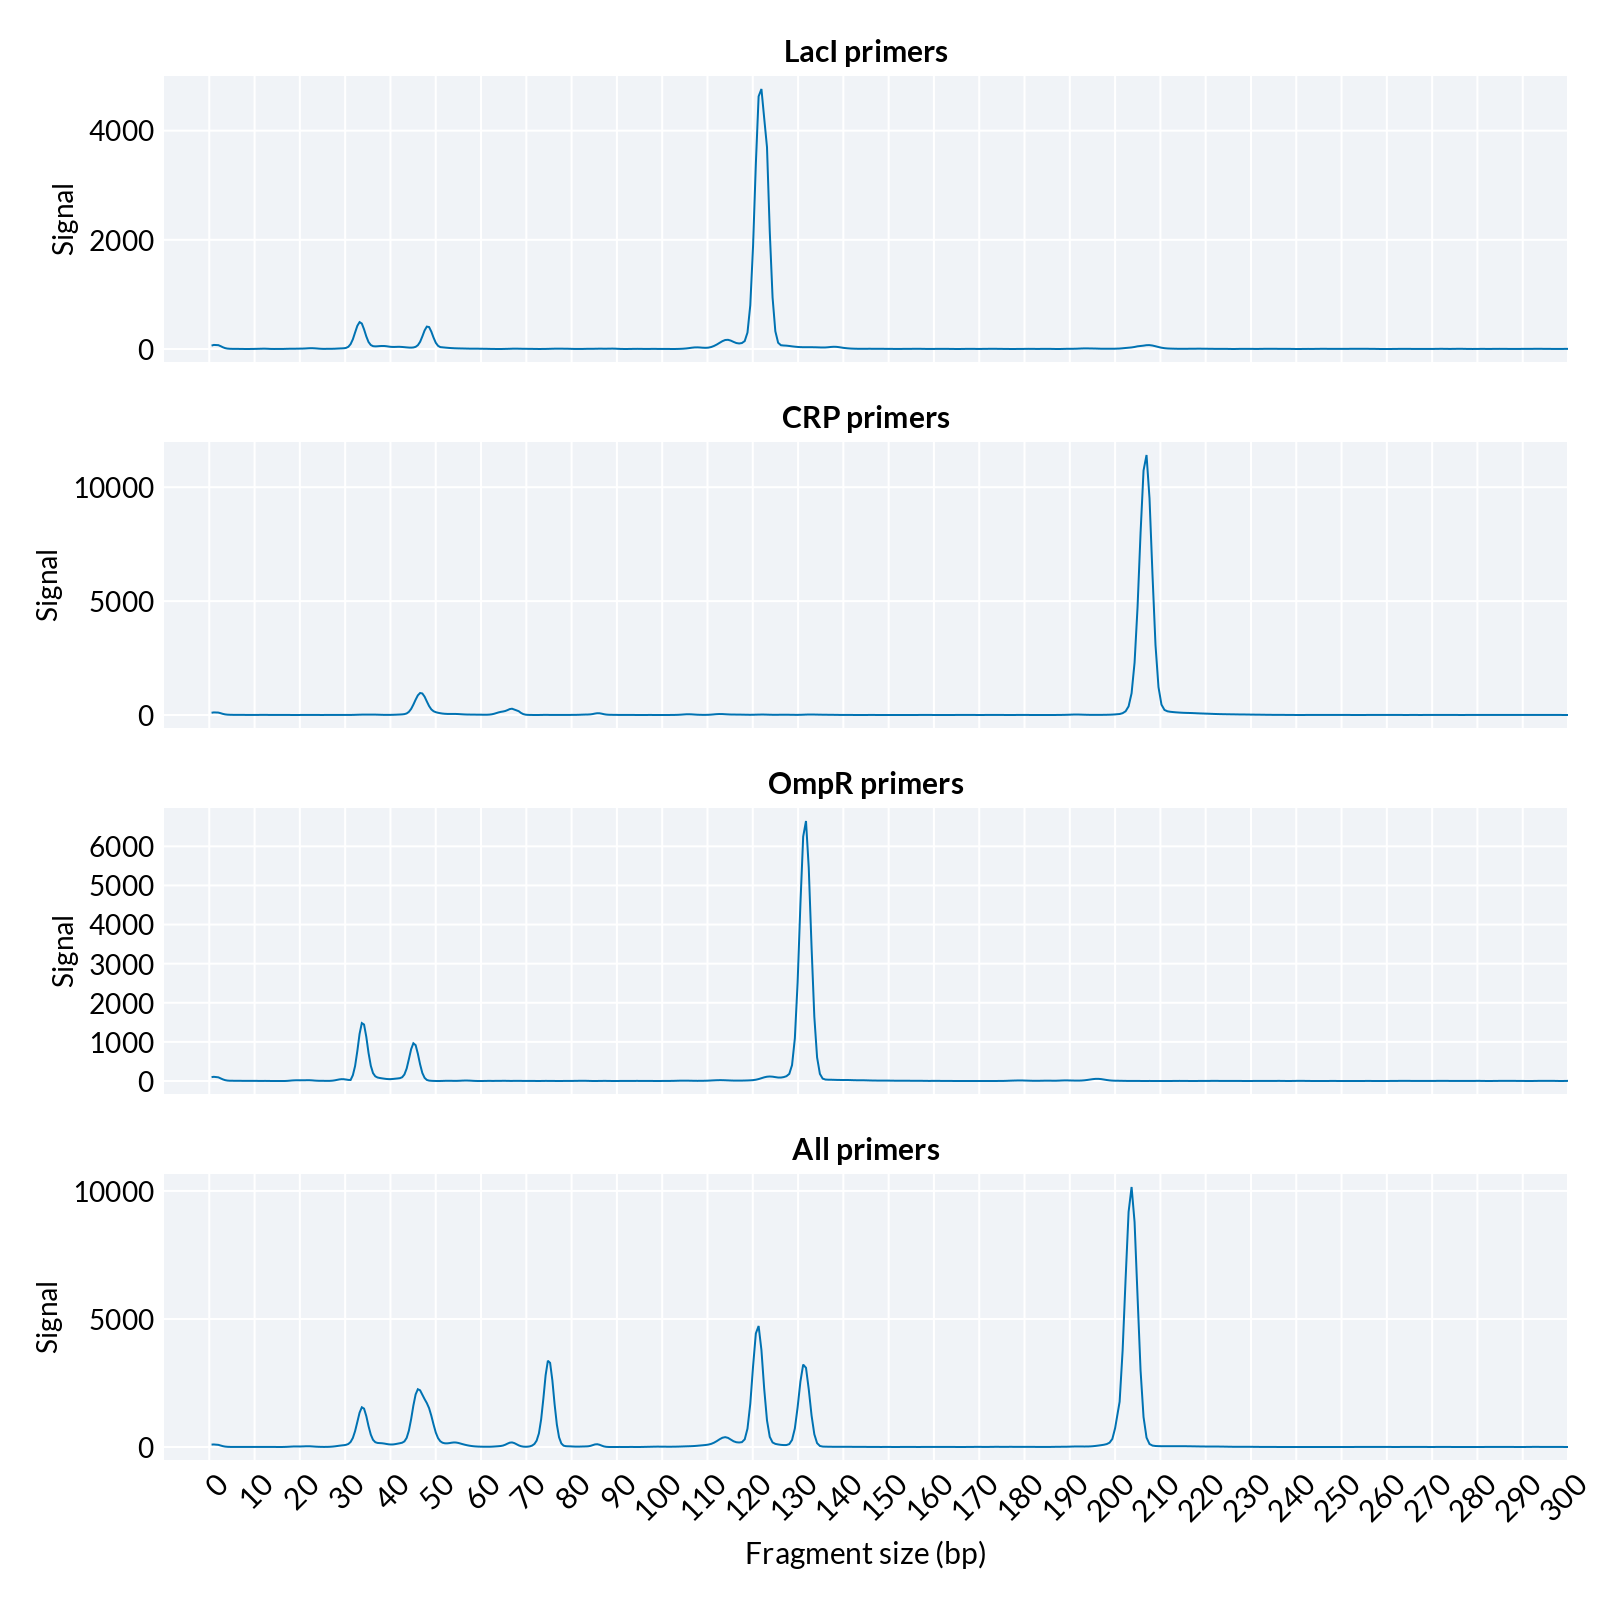

In [80]:
df_traces = CSV.read("../../data/bioanalyzer/17-22-35/2023 12 12 17H 22M Electropherogram.csv", DataFrame)

fig = Figure(size=(800, 800))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="LacI primers", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="CRP primers", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="OmpR primers", titlesize=15)
ax4 = Axis(g0[4, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="All primers", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "E1: SampE1"])
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "F1: SampF1"])
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "G1: SampG1"])
lines!(ax4, df_traces[!, "Size (bp)"], df_traces[!, "H1: SampH1"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
xlims!(ax4, -10, 300)

#rowgap!(g0, 0)
save("2023_fragment_analyer_primer_base.pdf", fig)
fig

## Round 2

In [81]:
df_traces = CSV.read("../../data/bioanalyzer/16-46-53/2023 12 14 16H 46M Electropherogram.csv", DataFrame)
df_peaks = CSV.read("../../data/bioanalyzer/16-46-53/2023 12 14 16H 46M Peak Table.csv", DataFrame)


df_samples = CSV.read("../../data/bioanalyzer/16-46-53/20231214 Samples.csv", DataFrame)
df_samples = rename(stack(df_samples, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Dict("value" => "sample"))
insertcols!(df_samples, 1, :well => df_samples.Column1 .* df_samples.variable)
df_samples = df_samples[!, [:well, :sample]]

df_primers = CSV.read("../../data/bioanalyzer/16-46-53/20231214 Primers.csv", DataFrame)
df_primers = rename(stack(df_primers, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Dict("value" => "primers"))
insertcols!(df_primers, 1, :well => df_primers.Column1 .* df_primers.variable)
df_primers = df_primers[!, [:well, :primers]]

df_meta = innerjoin(df_samples, df_primers, on=:well);
empty_wells = df_meta[df_meta.sample .== "x", :well]
df_peaks = df_peaks[map(x -> x ∉ empty_wells, df_peaks.Well), :]
df_peaks[!, "Size (bp)"] = parse.(Int64, df_peaks[!, "Size (bp)"])
df_peaks[!, "nmole/L"] = parse.(Float64, df_peaks[!, "nmole/L"]);

### LacI

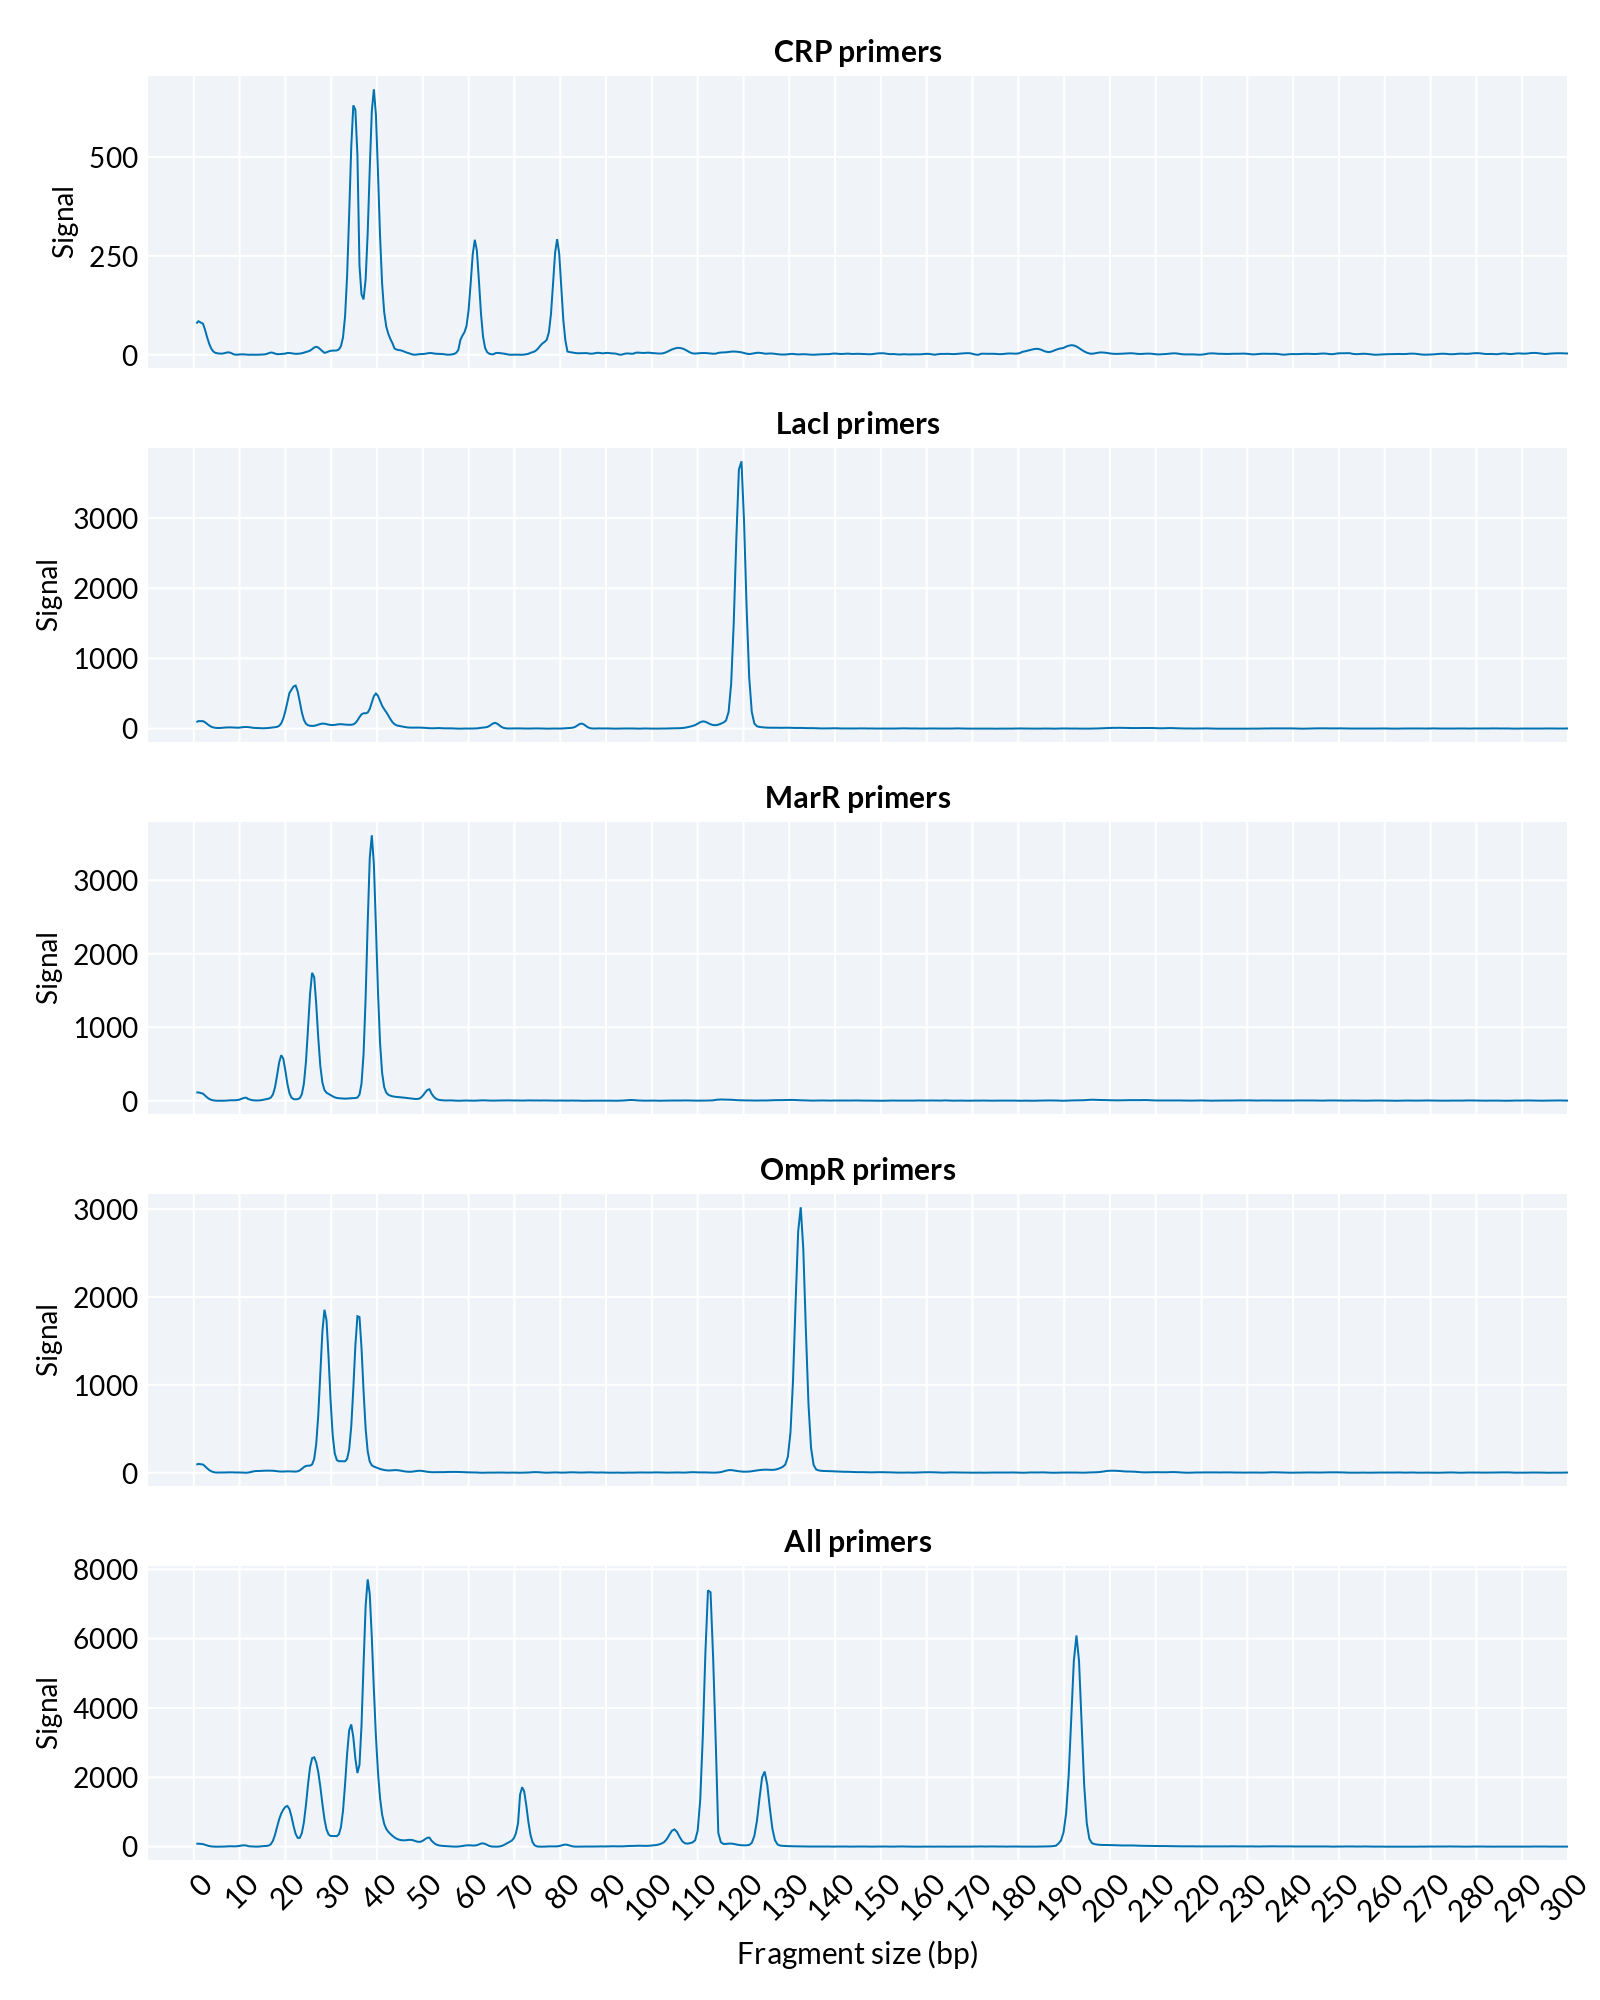

In [82]:
sample = "LacI-1_sol"

wells = df_meta[df_meta.sample .== sample, :]


fig = Figure(size=(800, 1000))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="CRP primers", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="LacI primers", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="MarR primers", titlesize=15)
ax4 = Axis(g0[4, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="OmpR primers", titlesize=15)
ax5 = Axis(g0[5, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="All primers", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

well = wells[wells.primers .== "CRP", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "LacI", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "MarR", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "OmpR", :well][1]
lines!(ax4, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "All", :well][1]
lines!(ax5, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
xlims!(ax4, -10, 300)
xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

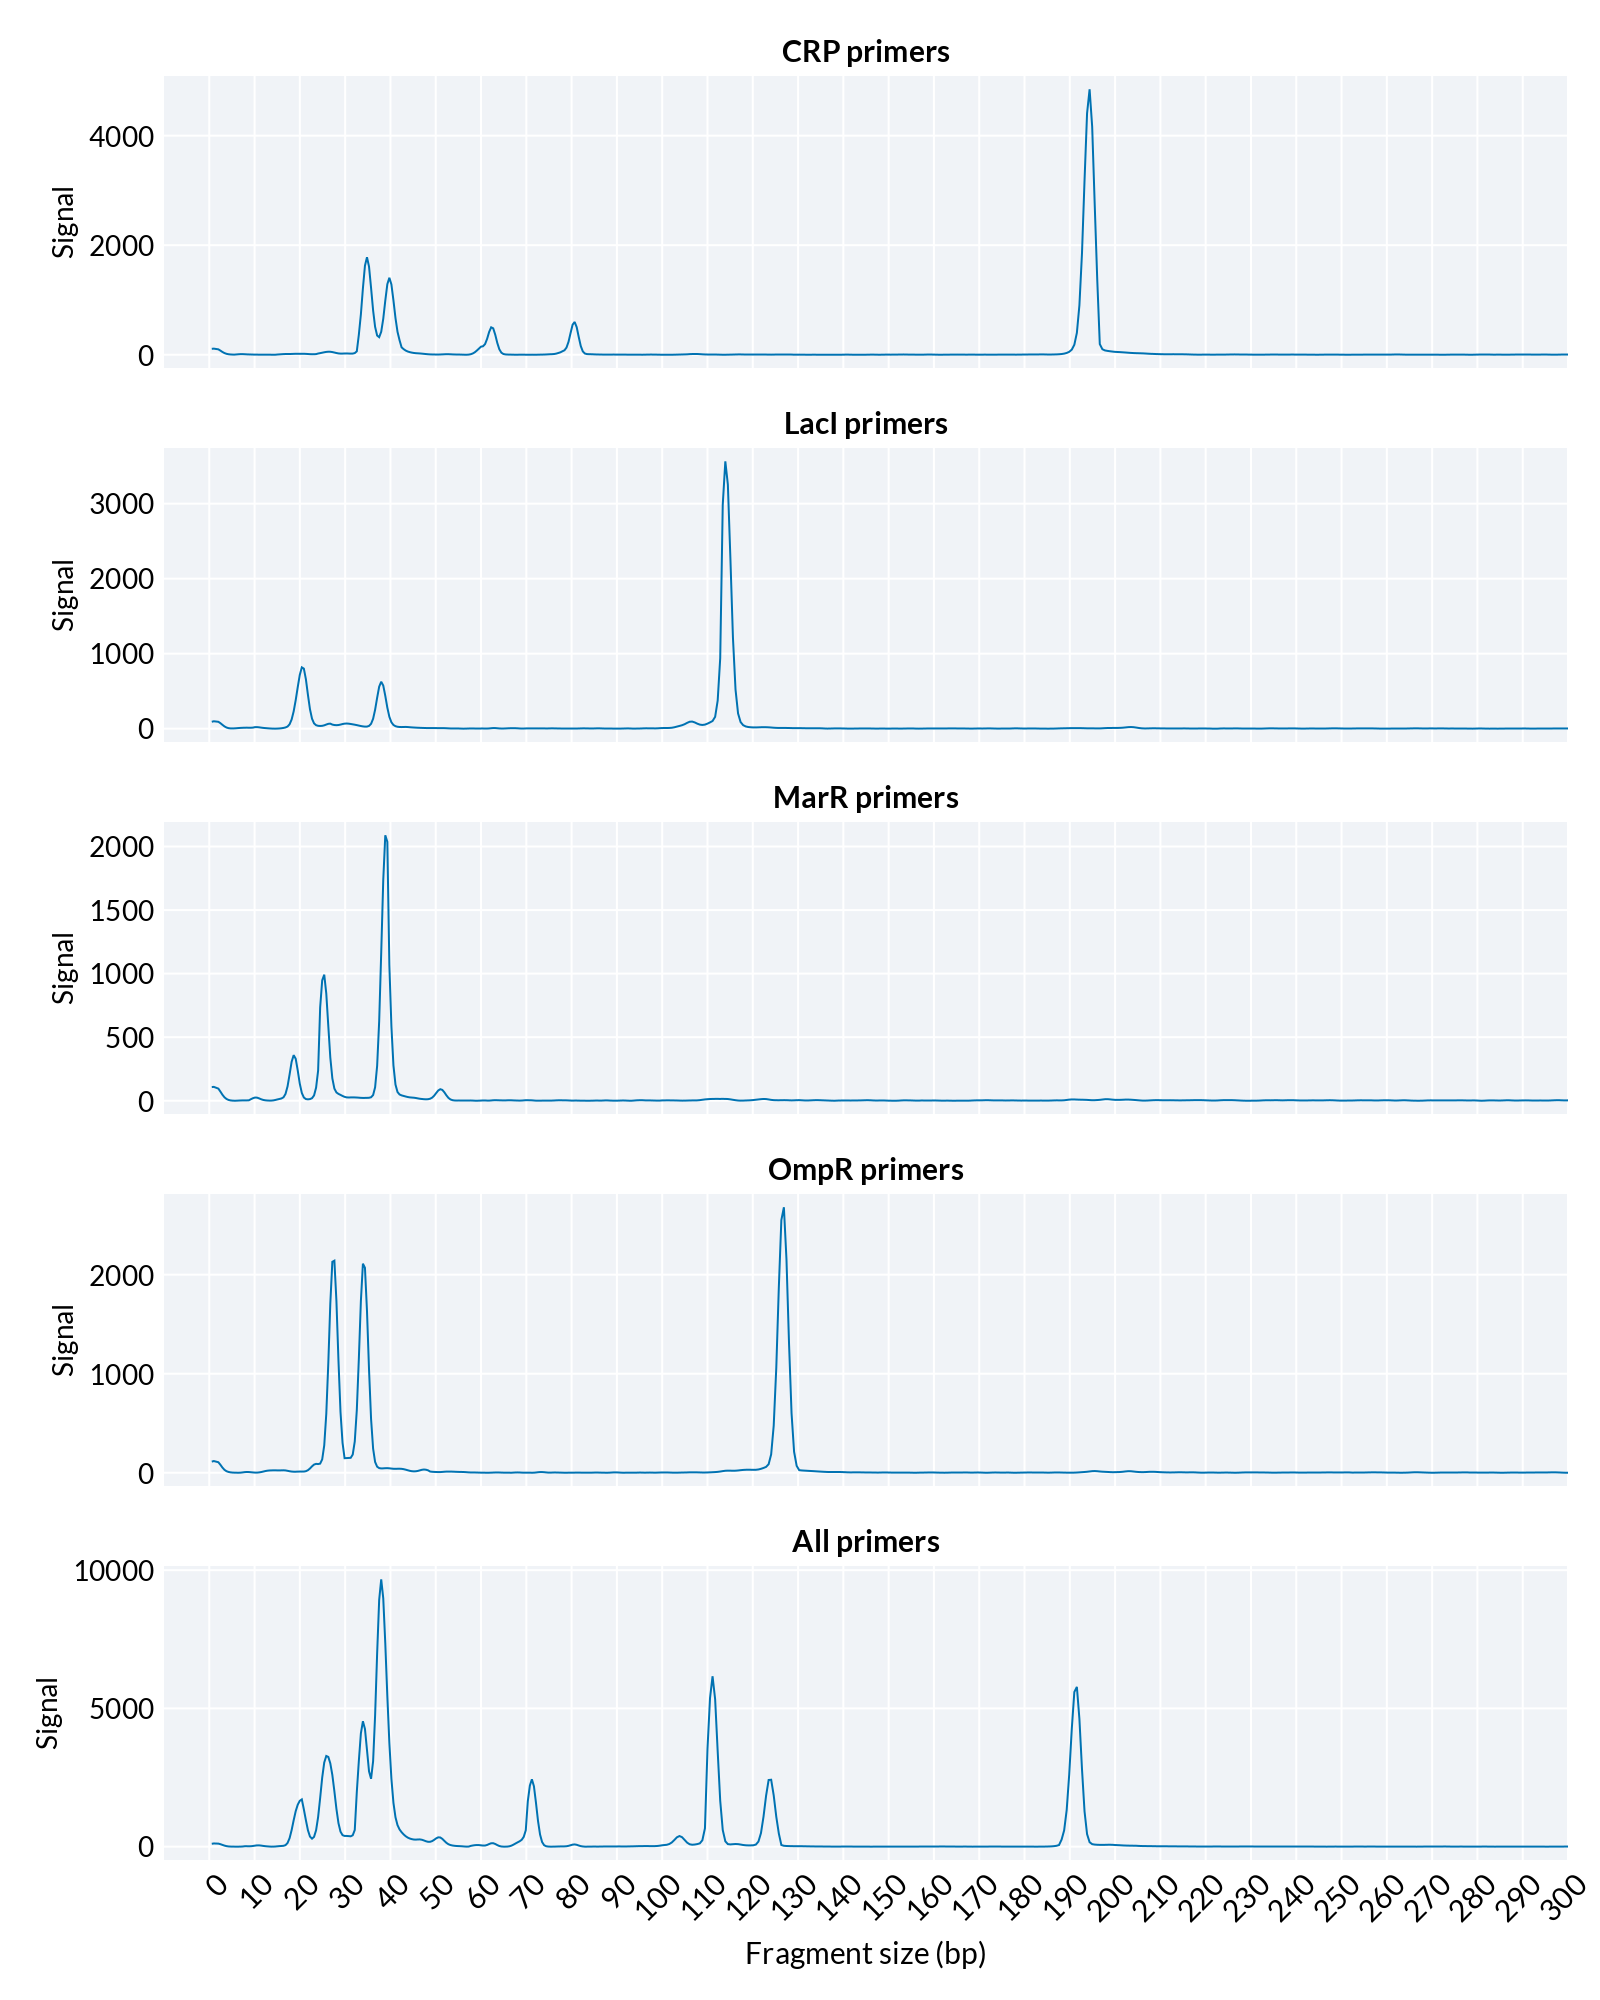

In [83]:
sample = "LacI-2_sol"

wells = df_meta[df_meta.sample .== sample, :]


fig = Figure(size=(800, 1000))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="CRP primers", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="LacI primers", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="MarR primers", titlesize=15)
ax4 = Axis(g0[4, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="OmpR primers", titlesize=15)
ax5 = Axis(g0[5, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="All primers", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

well = wells[wells.primers .== "CRP", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "LacI", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "MarR", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "OmpR", :well][1]
lines!(ax4, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "All", :well][1]
lines!(ax5, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
xlims!(ax4, -10, 300)
xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

### Enrichment

LacI-1_filt
D1
LacI-1_sol
E6


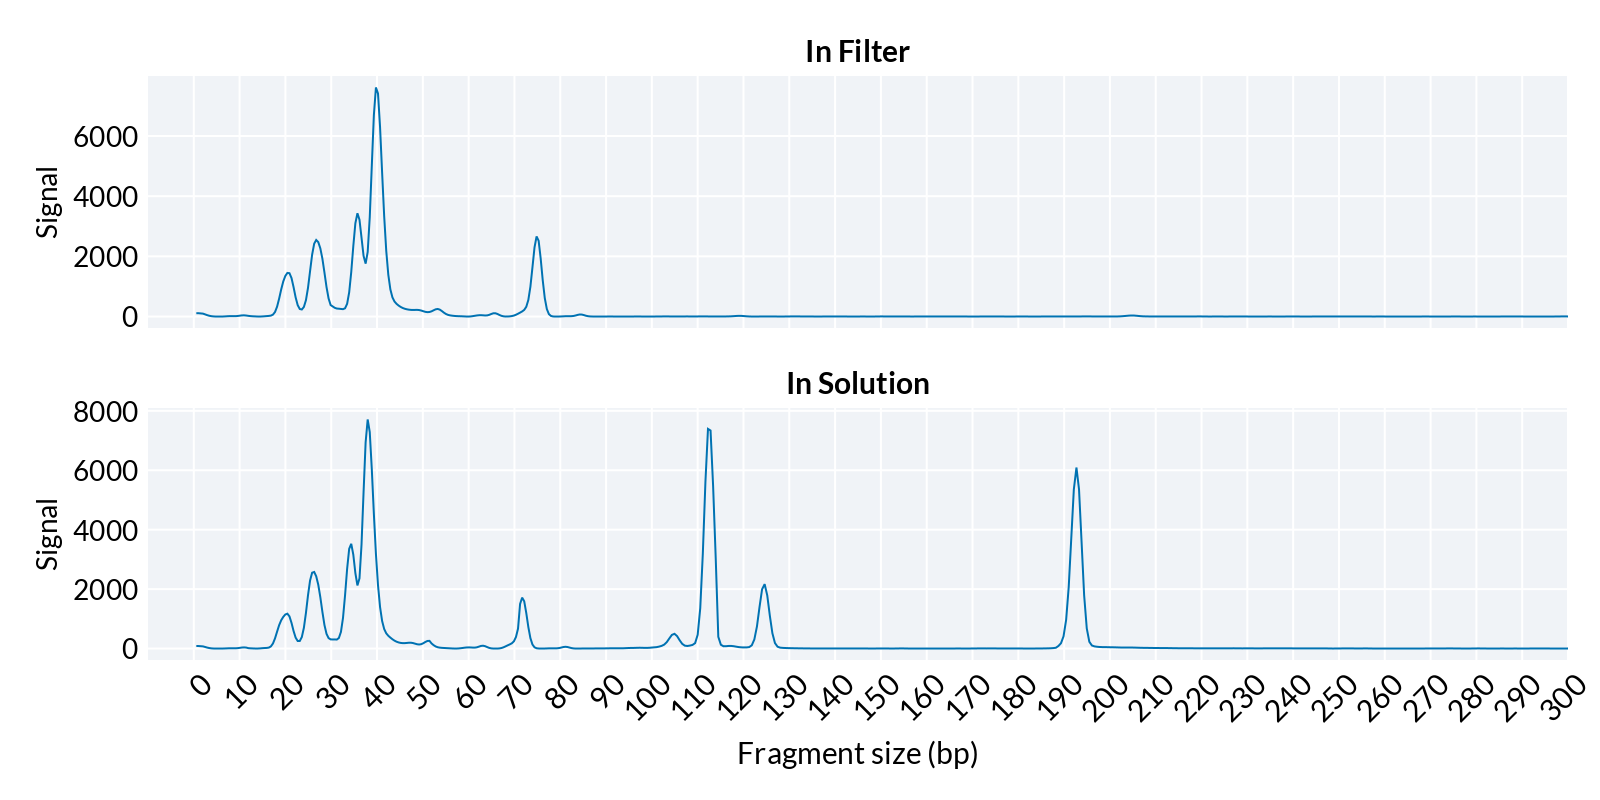

In [84]:
fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="In Filter", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-1_filt"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "LacI-1_sol"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])


xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "LacI-1_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "LacI-1_sol") .& (df_meta.primers .== "All"), :].well[1]
println("LacI-1_filt")
println(well1)
println("LacI-1_sol")
println(well2)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [85]:
println(df_peaks[df_peaks.Well .== well1, :])
println(df_peaks[df_peaks.Well .== well2, :])

9×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ D1       SampD1     1                1  missing                           653.339   0.5000                 112      missing       978.299        44526.9                      977.644   missing   missing 
   2 │ D1       SampD1     2               20  8.9                              6760.23    87.2969                1449     missing       978.299 

In [86]:
println("LacI-1_sol - LacI/OmpR")
df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"] |> println
println("LacI-1_sol - CRP/OmpR")
df_peaks[df_peaks.Well .== well2, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"] |> println

LacI-1_sol - LacI/OmpR
3.893640215145371
LacI-1_sol - CRP/OmpR
1.7538040490890805


LacI-2_filt
E1
LacI-2_sol
F6


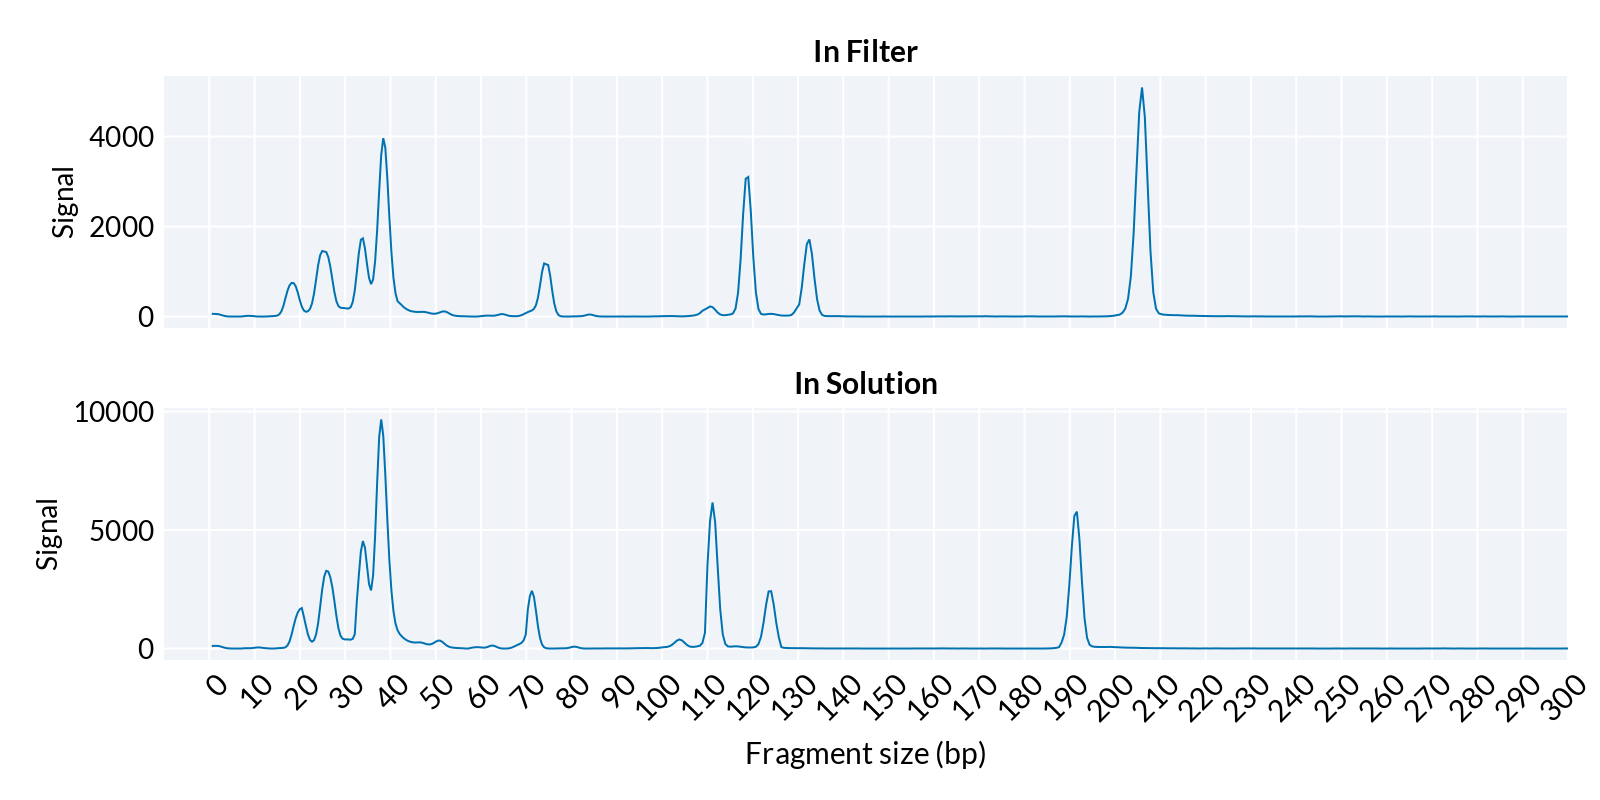

In [87]:
fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="In Filter", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-2_filt"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "LacI-2_sol"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])


xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)


well1 = df_meta[(df_meta.sample .== "LacI-2_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "LacI-2_sol") .& (df_meta.primers .== "All"), :].well[1]
println("LacI-2_filt")
println(well1)
println("LacI-2_sol")
println(well2)

fig

In [88]:
println(df_peaks[df_peaks.Well .== well1, :])
println(df_peaks[df_peaks.Well .== well2, :])

12×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ E1       SampE1     1                1  missing                           653.339   0.5000                 60       missing       1484.51        51106.9                      1492.77   missing   missing 
   2 │ E1       SampE1     2               18  5.4                              7241.38    80.3149                748      missing       1484.51

In [89]:
well1 = df_meta[(df_meta.sample .== "LacI-2_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "LacI-2_sol") .& (df_meta.primers .== "All"), :].well[1]

println("LacI-2_filt - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"] |> println
println("LacI-2_filt - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"] |> println


println("LacI-2_sol - LacI/OmpR")
df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"] |> println
println("LacI-2_sol - CRP/OmpR")
df_peaks[df_peaks.Well .== well2, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"] |> println

LacI-2_filt - LacI/OmpR
2.053334051493752
LacI-2_filt - CRP/OmpR
1.815855942738969
LacI-2_sol - LacI/OmpR
2.716203447506493
LacI-2_sol - CRP/OmpR
1.4605428377799807


LacI-3_filt
F1
LacI-3_sol
G6


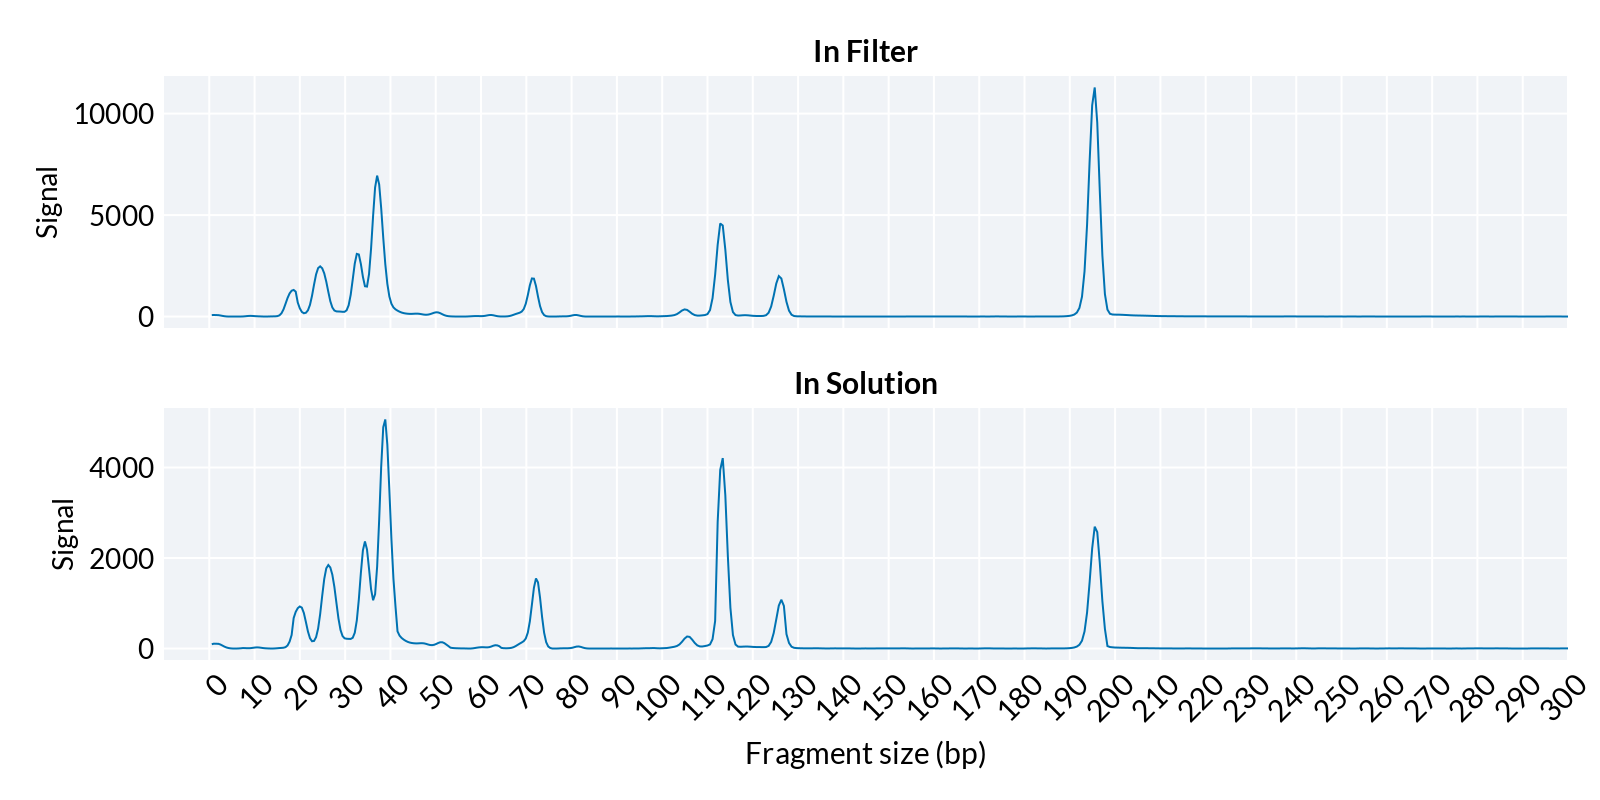

In [90]:
fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="In Filter", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-3_filt"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "LacI-3_sol"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])


xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "LacI-3_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "LacI-3_sol") .& (df_meta.primers .== "All"), :].well[1]
println("LacI-3_filt")
println(well1)
println("LacI-3_sol")
println(well2)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [91]:
println(df_peaks[df_peaks.Well .== well1, :])
println(df_peaks[df_peaks.Well .== well2, :])

14×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ F1       SampF1     1                1  missing                           653.339   0.5000                 77       missing        2223.7        76724.8                      2218.62   missing   missing 
   2 │ F1       SampF1     2               19  5.3                             10533.9     116.8329               1311     missing        2223.7

In [92]:
well1 = df_meta[(df_meta.sample .== "LacI-3_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "LacI-3_sol") .& (df_meta.primers .== "All"), :].well[1]

println("LacI-3_filt - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println
println("LacI-3_filt - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println


println("LacI-3_sol - LacI/OmpR")
df_peaks[df_peaks.Well .== well2, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"] |> println
println("LacI-3_sol - CRP/OmpR")
df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"] |> println

LacI-3_filt - LacI/OmpR
2.6099910166697975
LacI-3_filt - CRP/OmpR
3.5175358575220073
LacI-3_sol - LacI/OmpR
4.298265449033217
LacI-3_sol - CRP/OmpR
1.5337344211544917


### CRP

CRP-1_filt
A1
CRP-1_sol
B6


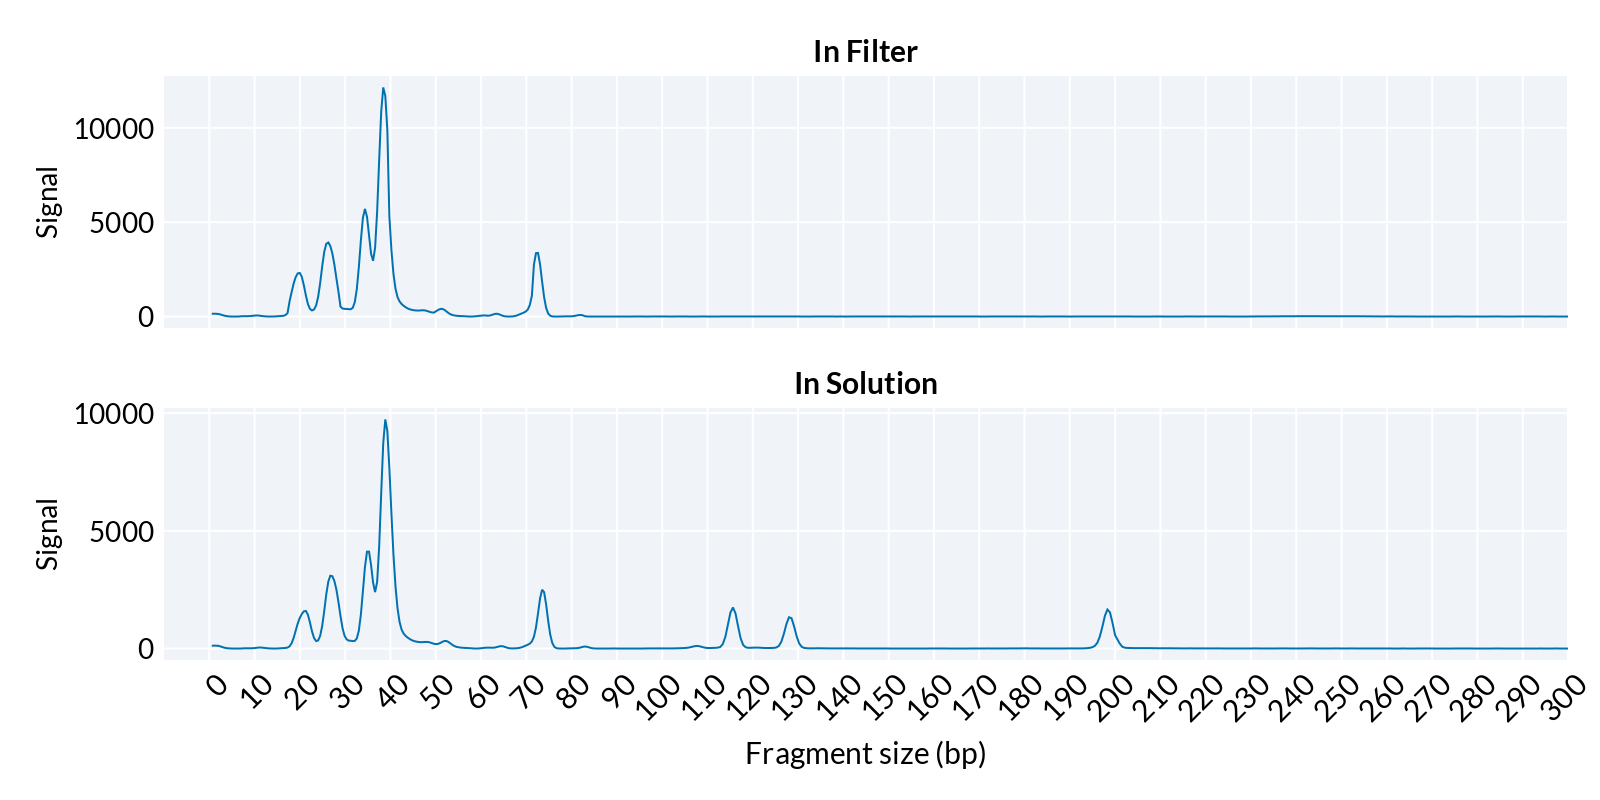

In [93]:
fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="In Filter", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "CRP-1_filt"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "CRP-1_sol"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])


xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "CRP-1_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "CRP-1_sol") .& (df_meta.primers .== "All"), :].well[1]
println("CRP-1_filt")
println(well1)
println("CRP-1_sol")
println(well2)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [94]:
println(df_peaks[df_peaks.Well .== well1, :])
println(df_peaks[df_peaks.Well .== well2, :])

10×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ A1       SampA1     1                1  missing                           653.339   0.5000                 152      missing        1147.5        55520.8                      1142.62   missing   missing 
   2 │ A1       SampA1     2               11  0.2                               382.886   2.3861                 59       missing        1147.5

In [95]:
println("CRP-1_sol - LacI/OmpR")
df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"] |> println
println("CRP-1_sol - CRP/OmpR")
df_peaks[df_peaks.Well .== well2, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"] |> println

CRP-1_sol - LacI/OmpR
1.4004980277074879
CRP-1_sol - CRP/OmpR
0.7638999801816821


CRP-2_filt
B1
CRP-2_sol
C6


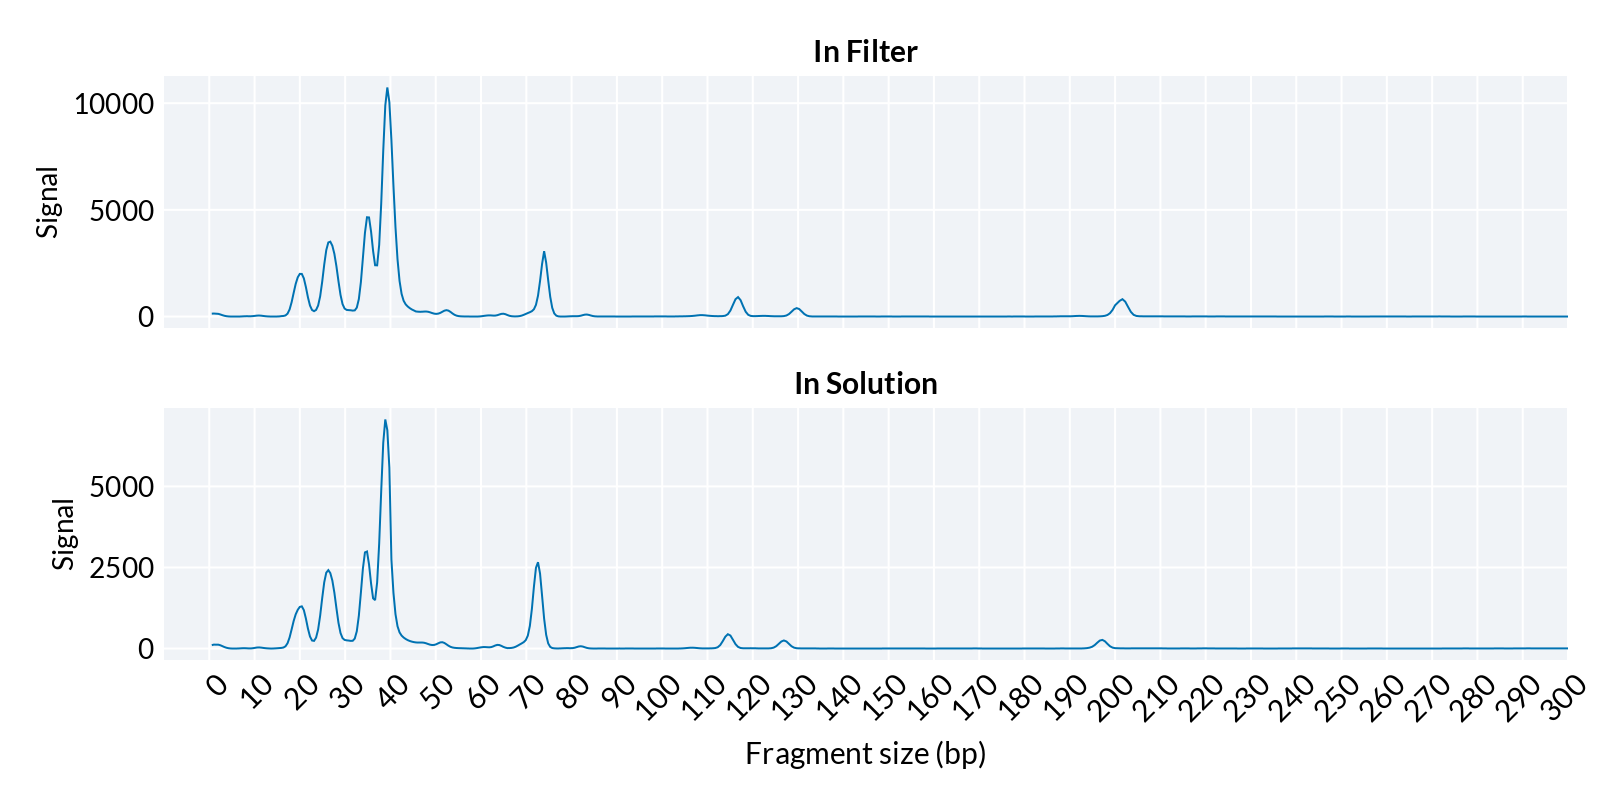

In [96]:
fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="In Filter", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "CRP-2_filt"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "CRP-2_sol"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])


xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)


well1 = df_meta[(df_meta.sample .== "CRP-2_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "CRP-2_sol") .& (df_meta.primers .== "All"), :].well[1]
println("CRP-2_filt")
println(well1)
println("CRP-2_sol")
println(well2)

fig

In [97]:
println(df_peaks[df_peaks.Well .== well1, :])
println(df_peaks[df_peaks.Well .== well2, :])

14×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ B1       SampB1     1                1  missing                           653.339   0.5000                 141      missing       1138.19        51133.9                      1132.53   missing   missing 
   2 │ B1       SampB1     2               20  8.3                              7689.12    94.6216                1999     missing       1138.19

In [98]:
well1 = df_meta[(df_meta.sample .== "CRP-2_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "CRP-2_sol") .& (df_meta.primers .== "All"), :].well[1]

println("CRP-2_filt - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println
println("CRP-2_filt - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println


println("CRP-2_sol - LacI/OmpR")
df_peaks[df_peaks.Well .== well2, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"] |> println
println("CRP-2_sol - CRP/OmpR")
df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"] |> println

CRP-2_filt - LacI/OmpR
2.6008905112509226
CRP-2_filt - CRP/OmpR
1.2986905913984674
CRP-2_sol - LacI/OmpR
1.9289998342732988
CRP-2_sol - CRP/OmpR
0.6979117418893047


CRP-3_filt
C1
CRP-3_sol
D6


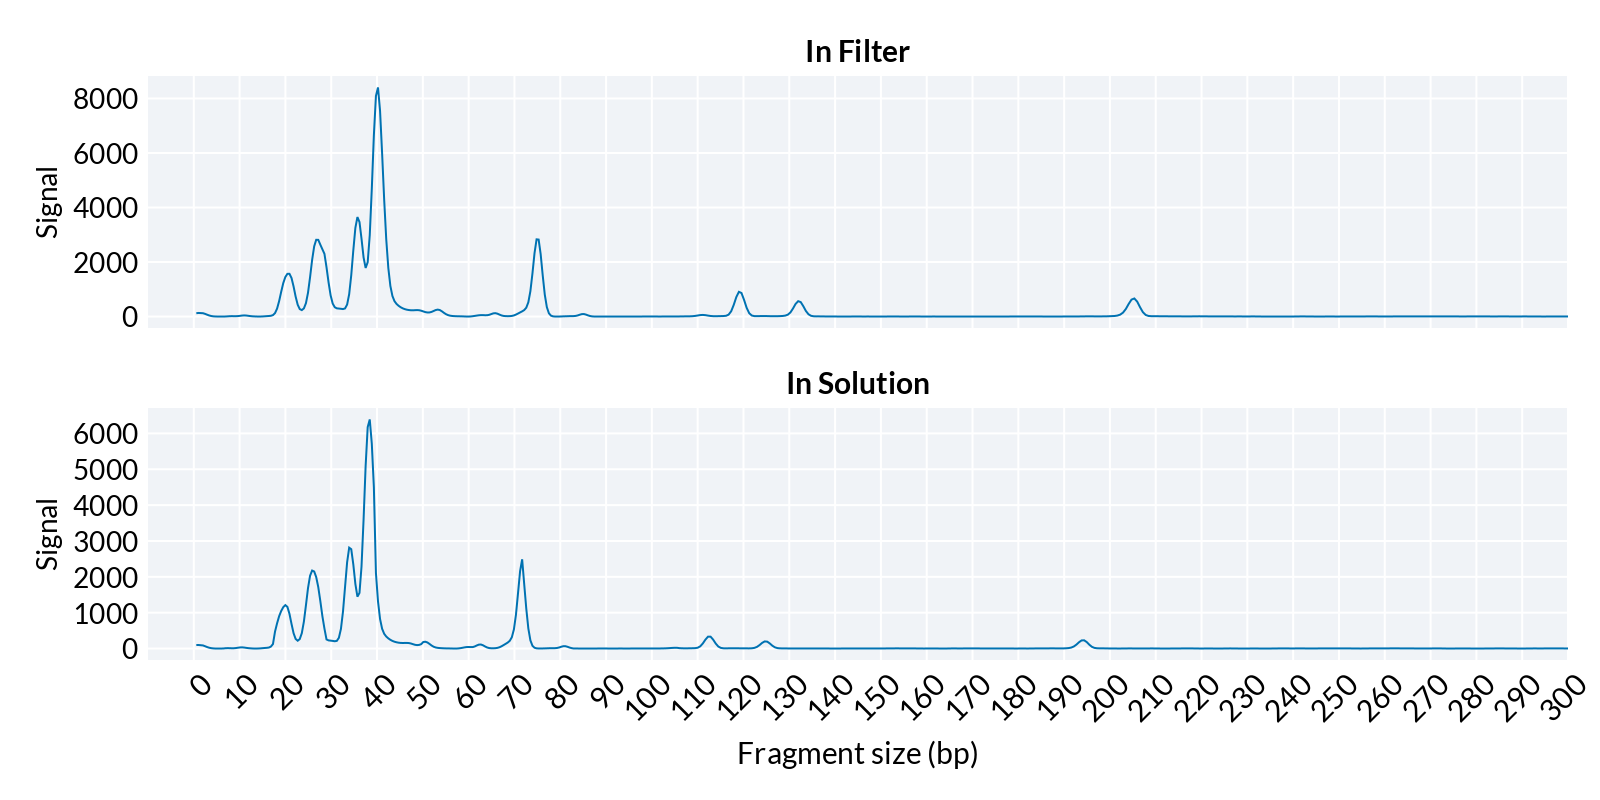

In [99]:
fig = Figure(size=(800, 400))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="In Filter", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "CRP-3_filt"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "CRP-3_sol"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])


xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "CRP-3_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "CRP-3_sol") .& (df_meta.primers .== "All"), :].well[1]
println("CRP-3_filt")
println(well1)
println("CRP-3_sol")
println(well2)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [100]:
println(df_peaks[df_peaks.Well .== well1, :])
println(df_peaks[df_peaks.Well .== well2, :])

13×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ C1       SampC1     1                1  missing                           653.339   0.5000                 132      missing       1005.97        43597.7                      1002.28   missing   missing 
   2 │ C1       SampC1     2               21  8.2                              6374.7     82.3185                1569     missing       1005.97

In [101]:
well1 = df_meta[(df_meta.sample .== "CRP-3_filt") .& (df_meta.primers .== "All"), :].well[1]
well2 = df_meta[(df_meta.sample .== "CRP-3_sol") .& (df_meta.primers .== "All"), :].well[1]

println("CRP-3_filt - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
println("CRP-3_filt - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println


println("CRP-3_sol - LacI/OmpR")
df_peaks[df_peaks.Well .== well2, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"] |> println
println("CRP-3_sol - CRP/OmpR")
df_peaks[df_peaks.Well .== well2, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well2, :][10, "nmole/L"] |> println

CRP-3_filt - LacI/OmpR
1.7444854903697495
CRP-3_filt - CRP/OmpR
0.7440020996358259
CRP-3_sol - LacI/OmpR
1.8509907532420844
CRP-3_sol - CRP/OmpR
0.698208861935916


## Round 2 Re-do

In [102]:
df_traces = CSV.read("../../data/bioanalyzer/2023 12 15 20H 12M Electropherogram.csv", DataFrame)
df_peaks = CSV.read("../../data/bioanalyzer/2023 12 15 20H 12M Peak Table.csv", DataFrame)


df_samples = CSV.read("../../data/bioanalyzer/20231215 Samples.csv", DataFrame)
df_samples = rename(stack(df_samples, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Dict("value" => "sample"))
insertcols!(df_samples, 1, :well => df_samples.Column1 .* df_samples.variable)
df_samples = df_samples[!, [:well, :sample]]

df_primers = CSV.read("../../data/bioanalyzer/20231215 Primers.csv", DataFrame)
df_primers = rename(stack(df_primers, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Dict("value" => "primers"))
insertcols!(df_primers, 1, :well => df_primers.Column1 .* df_primers.variable)
df_primers = df_primers[!, [:well, :primers]]

df_meta = innerjoin(df_samples, df_primers, on=:well);
empty_wells = df_meta[df_meta.sample .== "x", :well]
df_peaks = df_peaks[map(x -> x ∉ empty_wells, df_peaks.Well), :]
df_peaks[!, "Size (bp)"] = parse.(Int64, df_peaks[!, "Size (bp)"])
df_peaks[!, "nmole/L"] = parse.(Float64, df_peaks[!, "nmole/L"]);

LacI-2_1
B1


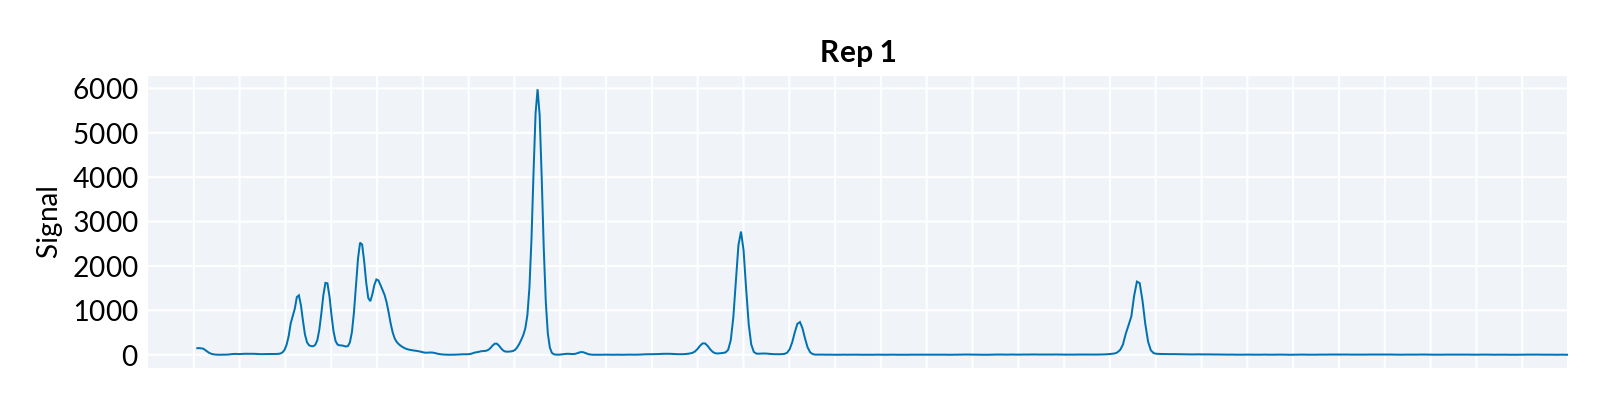

In [103]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-2_1"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "LacI-2_1") .& (df_meta.primers .== "All"), :].well[1]
println("LacI-2_1")
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [104]:
println(df_peaks[df_peaks.Well .== well1, :])

14×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ B1       SampB1     1                1  missing                          653.339   0.5000                 151      missing       624.926        20883.4                      629.424   missing   missing 
   2 │ B1       SampB1     2               11  0.3                              258.885   1.7706                 22       missing       624.926     

In [105]:
well1 = df_meta[(df_meta.sample .== "LacI-2_1") .& (df_meta.primers .== "All"), :].well[1]

println("LacI-2_1 - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println
println("LacI-2_1 - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println

LacI-2_1 - LacI/OmpR
4.122710833551433
LacI-2_1 - CRP/OmpR
1.4348527016099286


LacI-2_2
B2


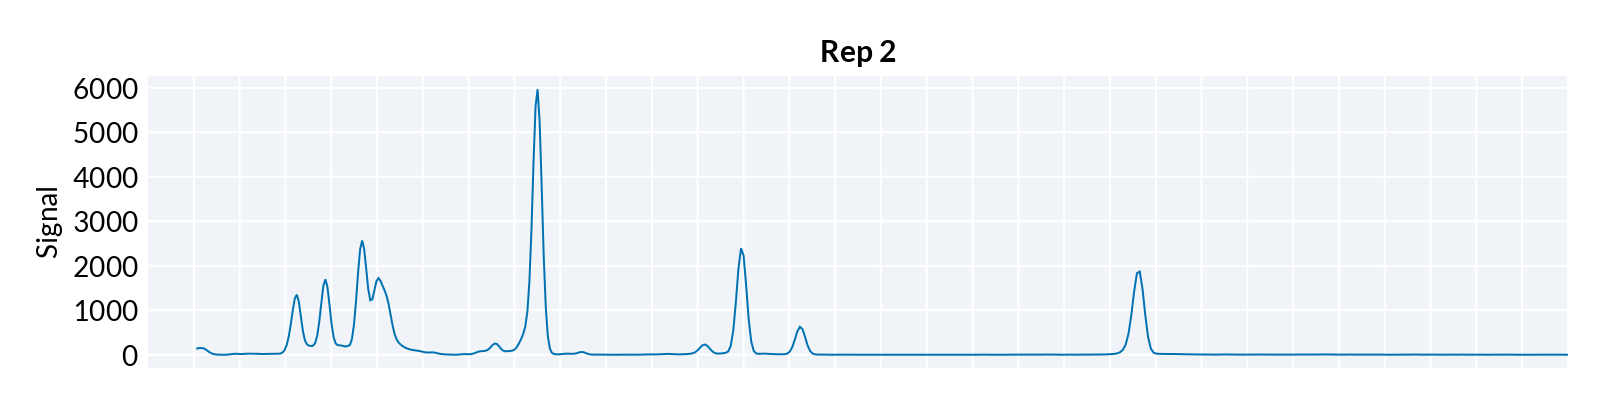

In [106]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 2", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-2_2"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "LacI-2_2") .& (df_meta.primers .== "All"), :].well[1]
println("LacI-2_2")
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [107]:
println(df_peaks[df_peaks.Well .== well1, :])

13×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ B2       SampB2     1                1  missing                          653.339   0.5000                 149      missing       617.742        20949.0                      622.318   missing   missing 
   2 │ B2       SampB2     2                9  0.1                              121.523   0.6835                 21       missing       617.742     

In [108]:
well1 = df_meta[(df_meta.sample .== "LacI-2_2") .& (df_meta.primers .== "All"), :].well[1]

println("LacI-2_2 - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
println("LacI-2_2 - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println

LacI-2_2 - LacI/OmpR
4.213780788558284
LacI-2_2 - CRP/OmpR
1.9348405982942036


LacI-2_3
B3


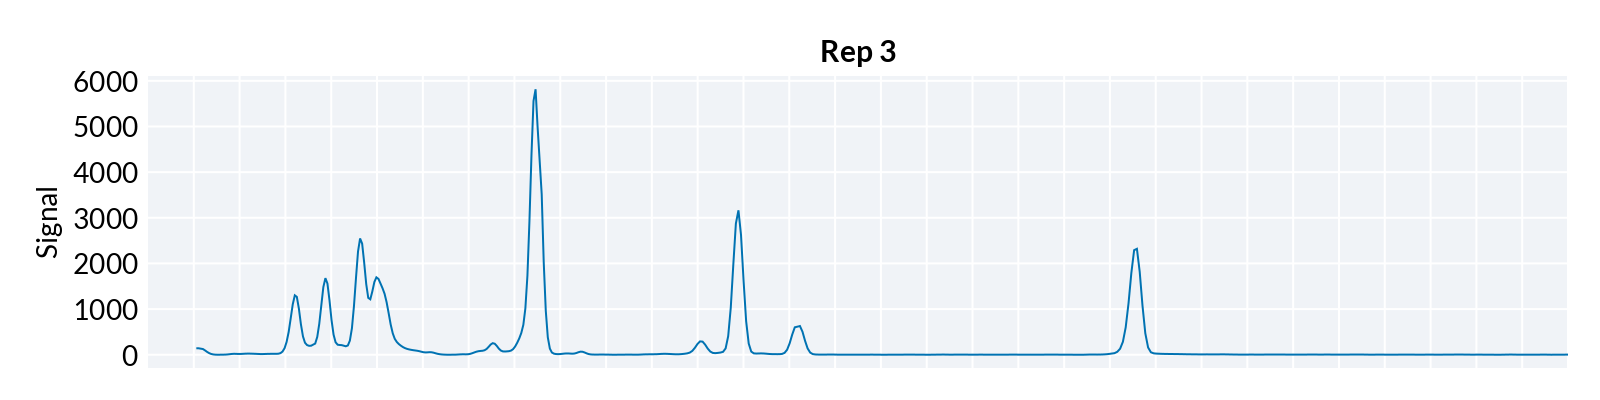

In [109]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 3", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-2_3"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== "LacI-2_3") .& (df_meta.primers .== "All"), :].well[1]
println("LacI-2_3")
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [110]:
println(df_peaks[df_peaks.Well .== well1, :])

14×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ B3       SampB3     1                1  missing                          653.339   0.5000                 142      missing       674.398        22247.3                      679.529   missing   missing 
   2 │ B3       SampB3     2               12  0.3                              298.149   2.0391                 24       missing       674.398     

In [111]:
well1 = df_meta[(df_meta.sample .== "LacI-2_3") .& (df_meta.primers .== "All"), :].well[1]

println("LacI-2_3 - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println
println("LacI-2_3 - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println

LacI-2_3 - LacI/OmpR
5.424955057625881
LacI-2_3 - CRP/OmpR
2.31389861083433


CRP-2_1
A1


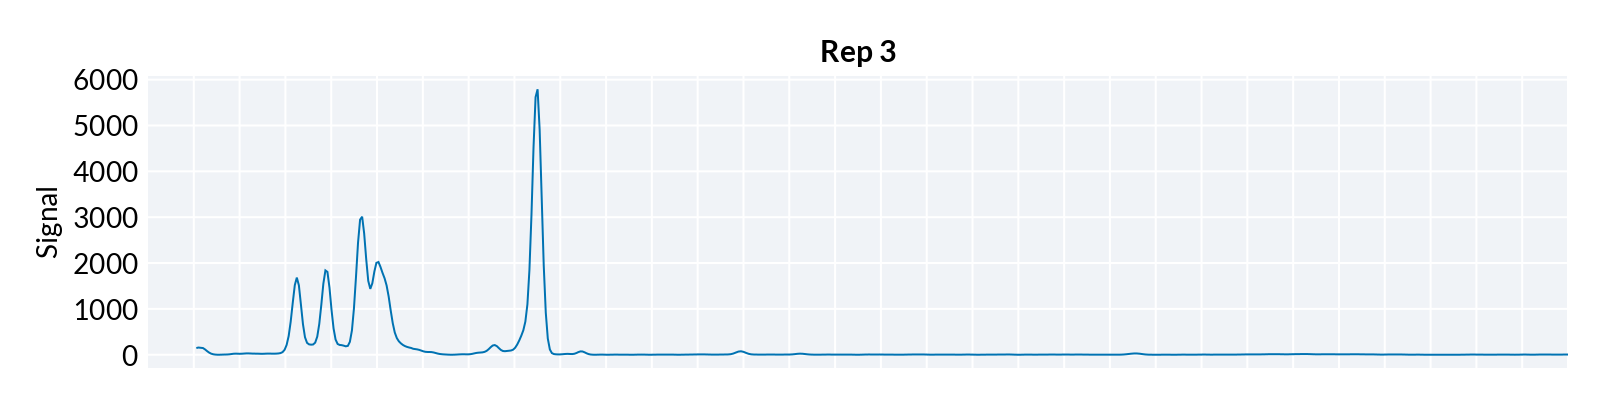

In [112]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 3", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "CRP-2_1"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [113]:
println(df_peaks[df_peaks.Well .== well1, :])

12×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ A1       SampA1     1                1  missing                          653.339   0.5000                 157      missing        554.08        22257.6                      562.547   missing   missing 
   2 │ A1       SampA1     2                9  0.1                              132.749   0.7466                 24       missing        554.08     

In [114]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"] |> println

CRP-2_1 - LacI/OmpR
3.33141603642439
CRP-2_1 - CRP/OmpR
0.6747312170796719


CRP-2_2
A2


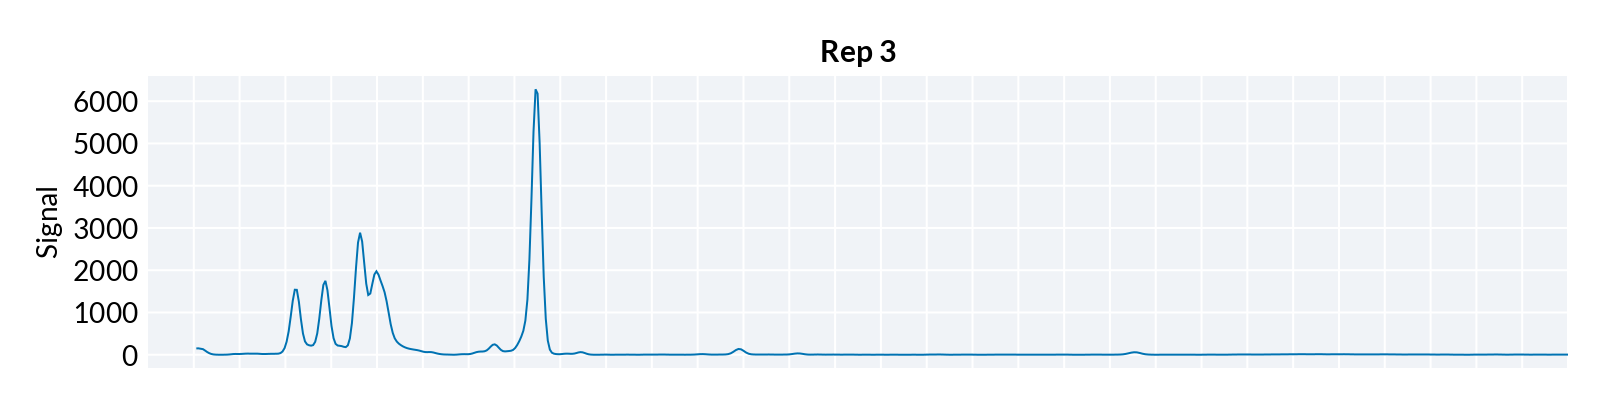

In [115]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 3", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "CRP-2_2"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [116]:
println(df_peaks[df_peaks.Well .== well1, :])

12×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ A2       SampA2     1                1  missing                          653.339   0.5000                 151      missing       560.102        22002.9                      568.984   missing   missing 
   2 │ A2       SampA2     2               12  0.4                              286.596   2.1342                 26       missing       560.102     

In [117]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"] |> println

CRP-2_2 - LacI/OmpR
3.5234349966500624
CRP-2_2 - CRP/OmpR
0.8410454717585715


CRP-2_3
A3


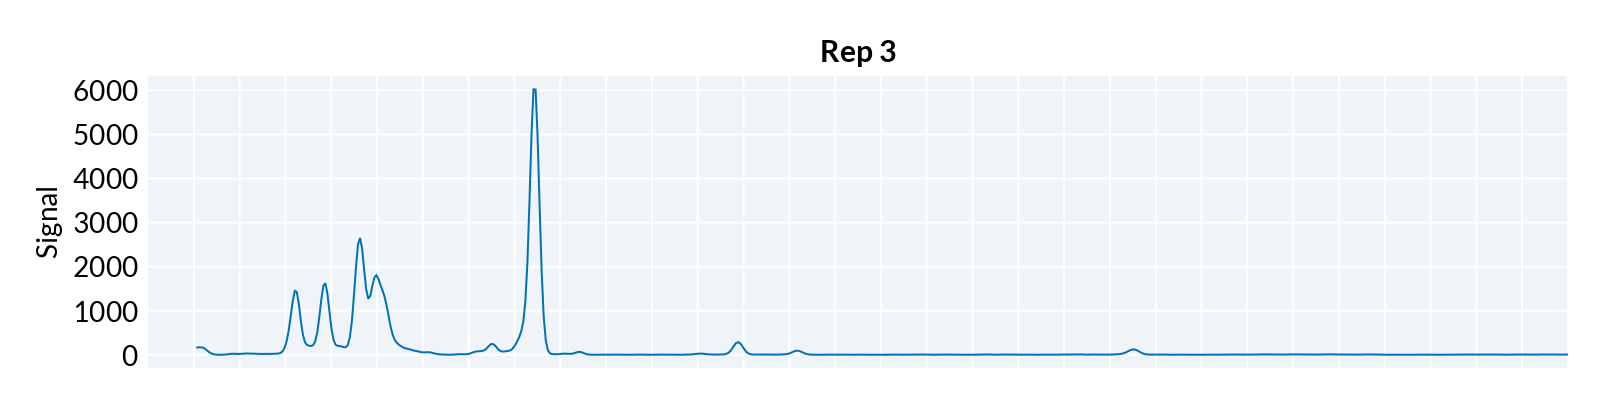

In [118]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 3", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "CRP-2_3"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [119]:
println(df_peaks[df_peaks.Well .== well1, :])

13×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ A3       SampA3     1                1  missing                          653.339   0.5000                 170      missing        467.34        18120.5                      472.793   missing   missing 
   2 │ A3       SampA3     2                9  0.1                              121.39    0.6828                 23       missing        467.34     

In [120]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println

CRP-2_3 - LacI/OmpR
3.278700939812521
CRP-2_3 - CRP/OmpR
0.8025185203088934


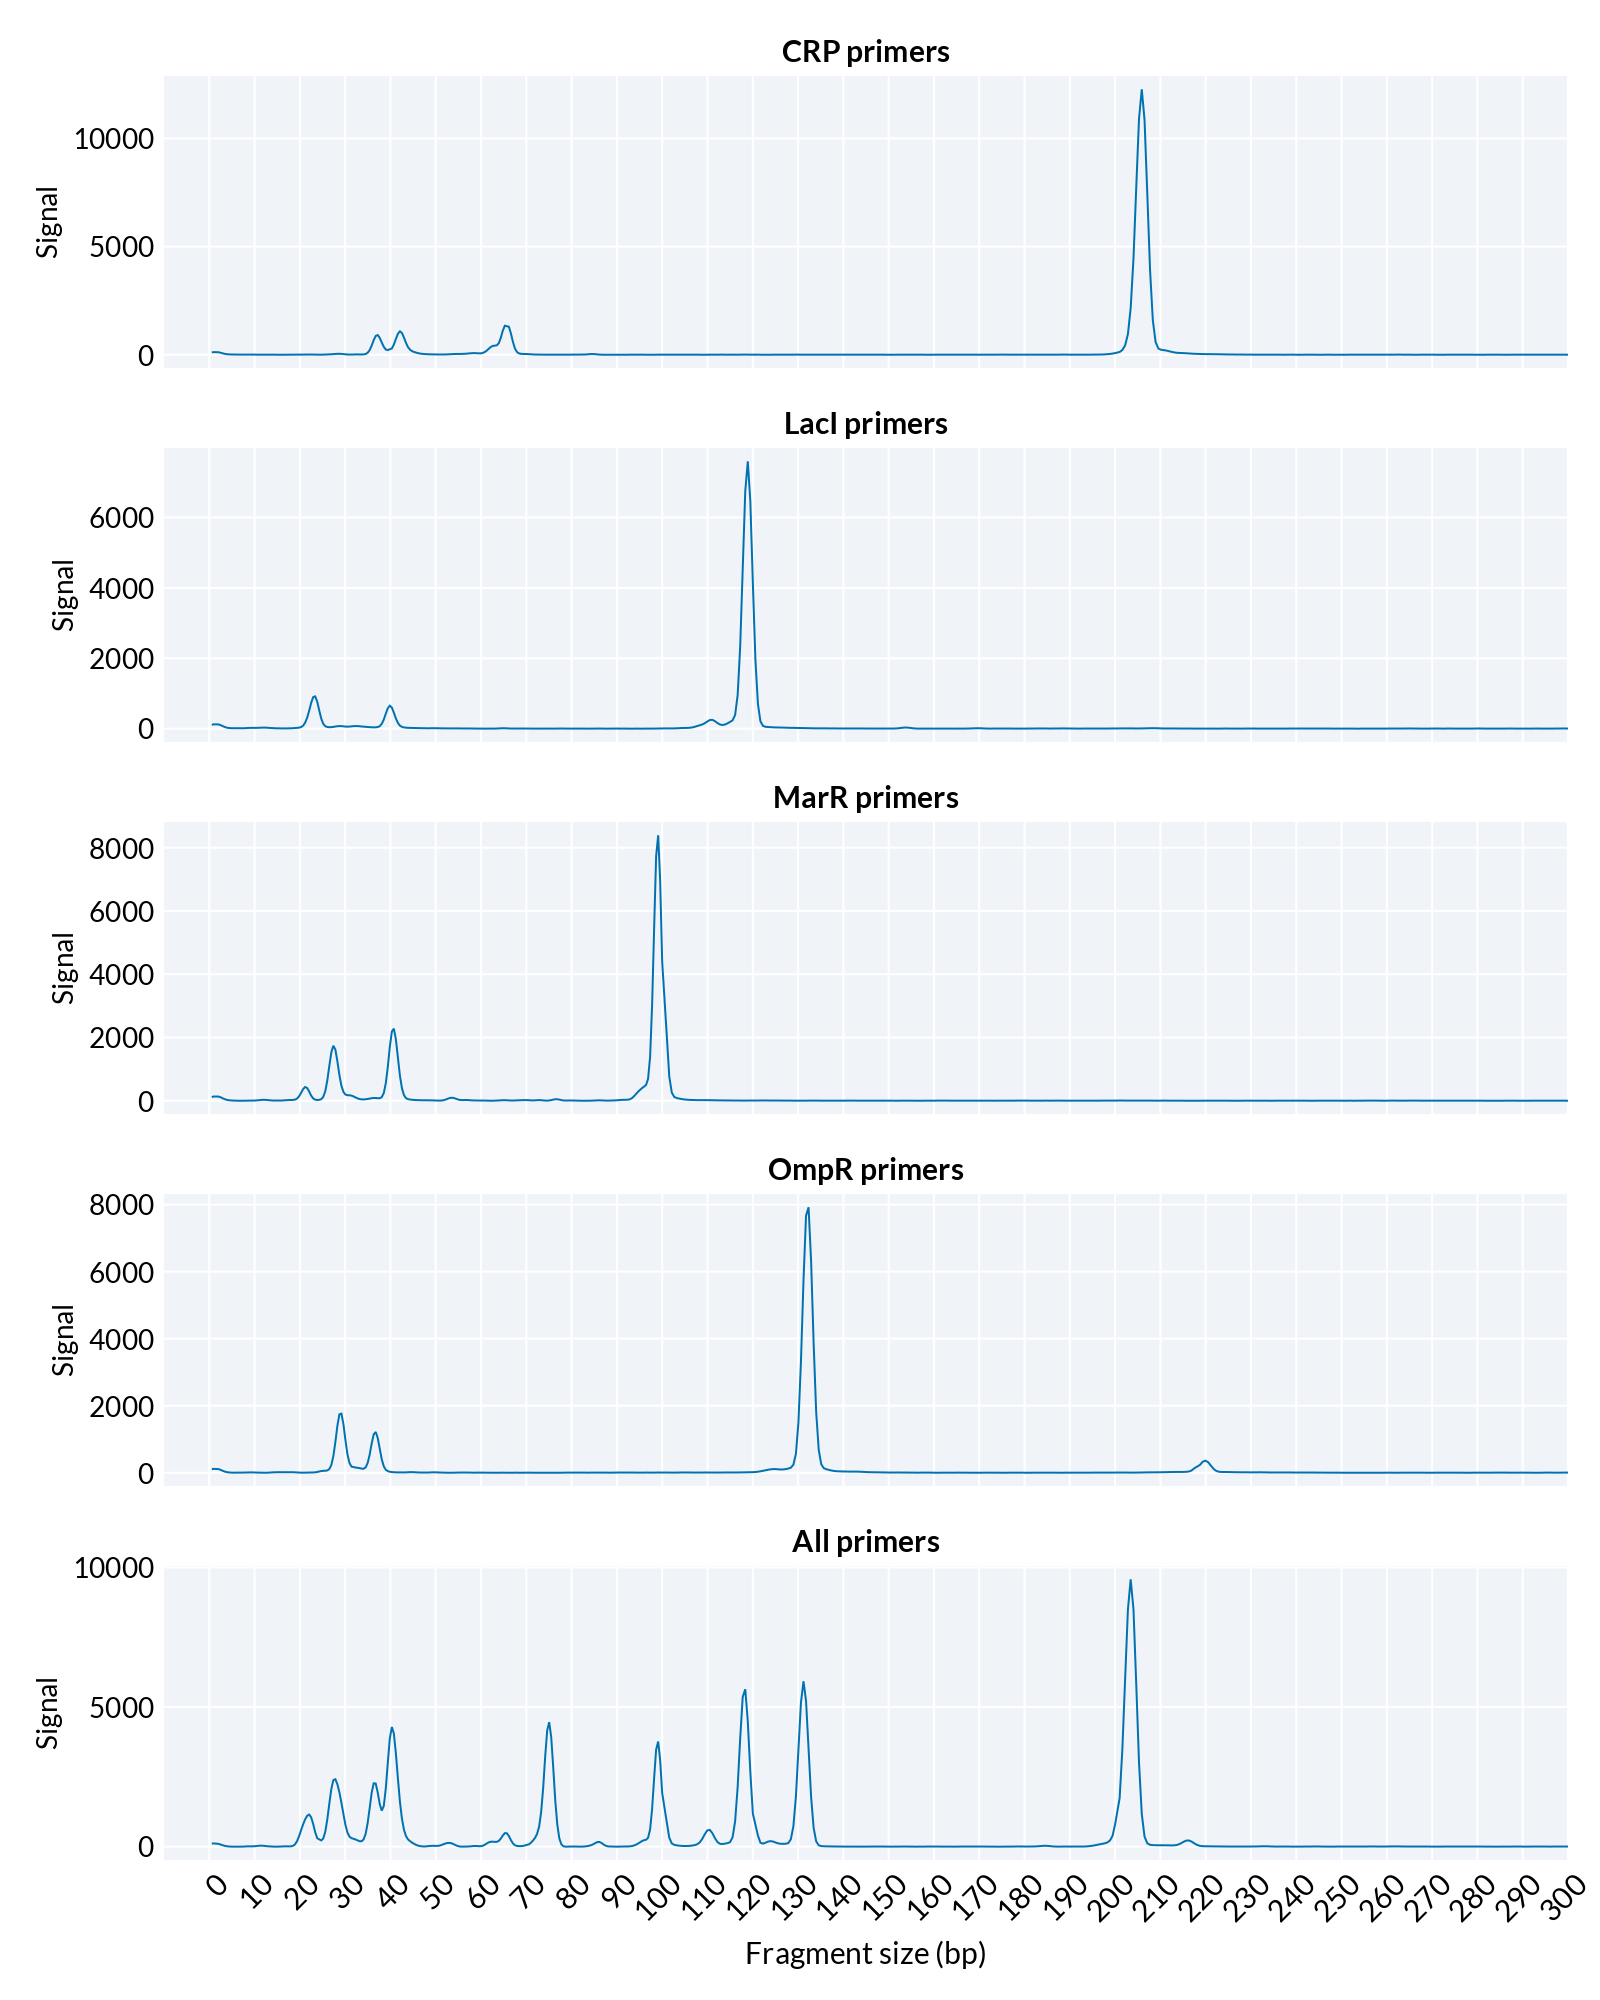

In [121]:
sample = "MarR-1_1"

wells = df_meta[df_meta.sample .== sample, :]


fig = Figure(size=(800, 1000))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="CRP primers", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="LacI primers", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="MarR primers", titlesize=15)
ax4 = Axis(g0[4, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="OmpR primers", titlesize=15)
ax5 = Axis(g0[5, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="All primers", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

well = wells[wells.primers .== "CRP", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "LacI", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "MarR", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "OmpR", :well][1]
lines!(ax4, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "All", :well][1]
lines!(ax5, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
xlims!(ax4, -10, 300)
xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

N4
H7


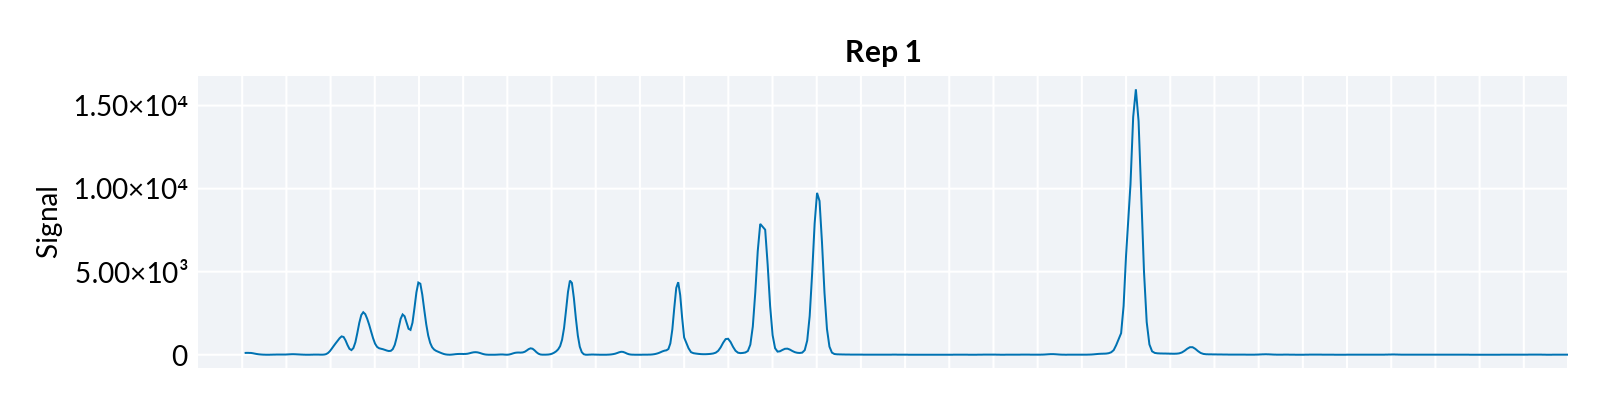

In [122]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "N4"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [123]:
println(df_peaks[df_peaks.Well .== well1, :])

20×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ H7       SampH7     1                1  missing                          653.339   0.5000                 114      missing        1969.9        46776.3                      1963.39   missing   missing 
   2 │ H7       SampH7     2               11  0.1                              292.782   2.0024                 32       missing        1969.9     

In [124]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][16, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println

N4 - LacI/OmpR
0.9380457251960733
N4 - CRP/OmpR
1.0188781444253807
N4 - MarR/OmpR
0.6462476920917043


MarR-1_1
H4


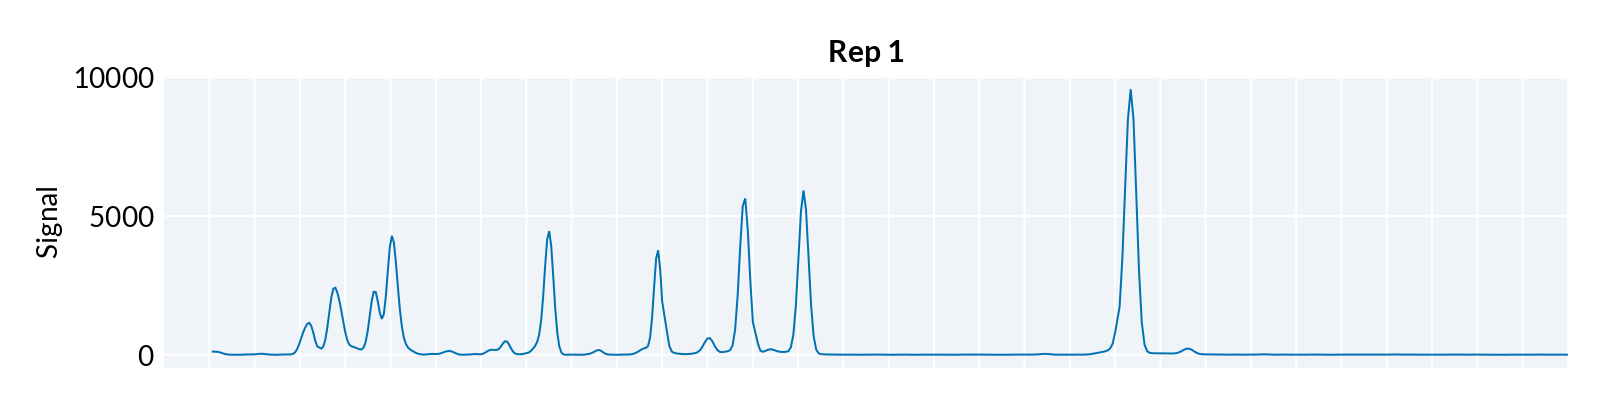

In [125]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-1_1"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [126]:
println(df_peaks[df_peaks.Well .== well1, :])

19×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ H4       SampH4     1                1  missing                          653.339   0.5000                 114      missing       1552.31        41448.5                      1548.96   missing   missing 
   2 │ H4       SampH4     2               11  0.1                              273.473   1.8704                 35       missing       1552.31     

In [127]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][16, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println

MarR-1_1 - LacI/OmpR
1.1171736471648208
MarR-1_1 - CRP/OmpR
1.021145825786689
MarR-1_1 - MarR/OmpR
0.9295006713807276


MarR-1_2
H5


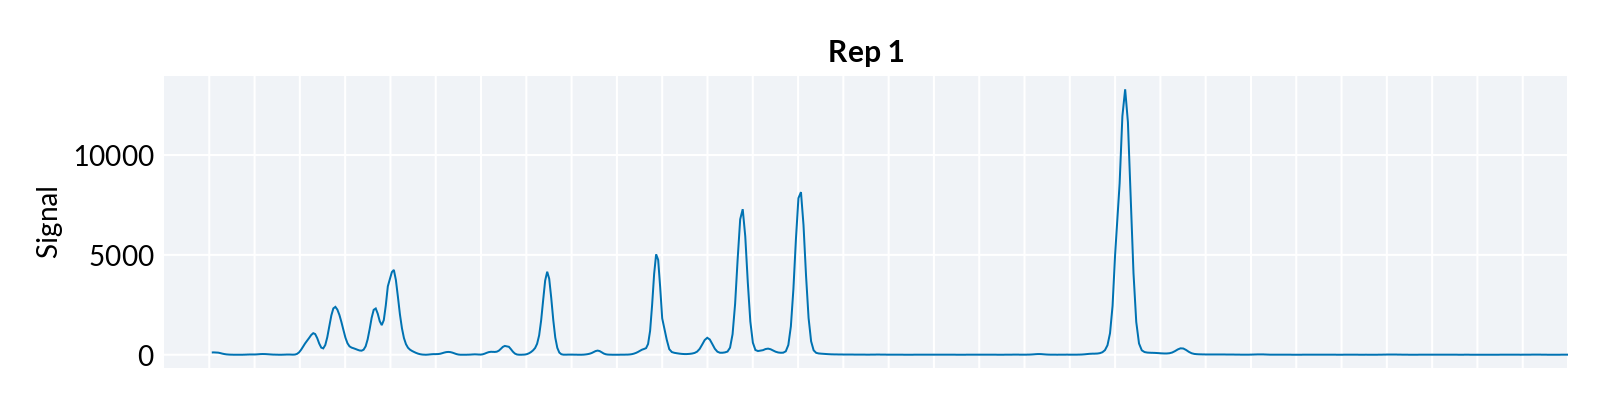

In [128]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-1_2"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [129]:
println(df_peaks[df_peaks.Well .== well1, :])

19×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ H5       SampH5     1                1  missing                          653.339   0.5000                 117      missing       1818.21        44092.2                      1810.69   missing   missing 
   2 │ H5       SampH5     2               12  0.1                              308.348   2.1089                 35       missing       1818.21     

In [130]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][16, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println

MarR-1_2 - LacI/OmpR
1.0215561831624038
MarR-1_2 - CRP/OmpR
1.0111275981086678
MarR-1_2 - MarR/OmpR
0.8804172600469616


MarR-1_3
H6


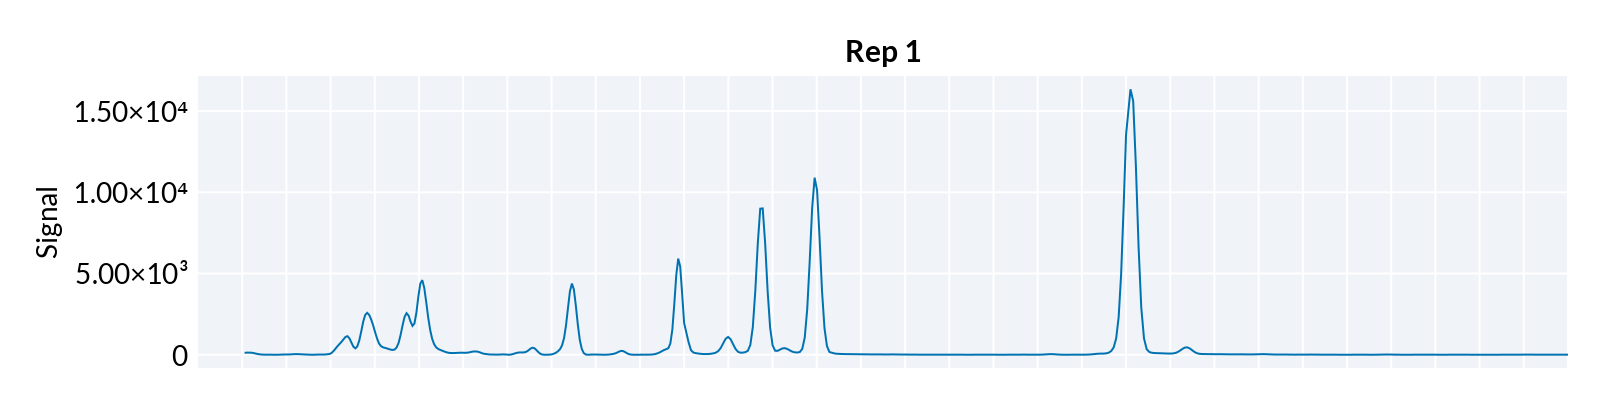

In [131]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-1_3"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [132]:
println(df_peaks[df_peaks.Well .== well1, :])

18×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ H6       SampH6     1                1  missing                           364.246   0.5000                 129      missing       1915.53        43866.7                      1916.58   missing   missing 
   2 │ H6       SampH6     2               12  0.1                               292.773   2.1802                 39       missing       1915.53

In [133]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][15, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println

MarR-1_3 - LacI/OmpR
0.9689848680772916
MarR-1_3 - CRP/OmpR
0.940408343514021
MarR-1_3 - MarR/OmpR
0.7647311345578242


MarR-2_1
H1


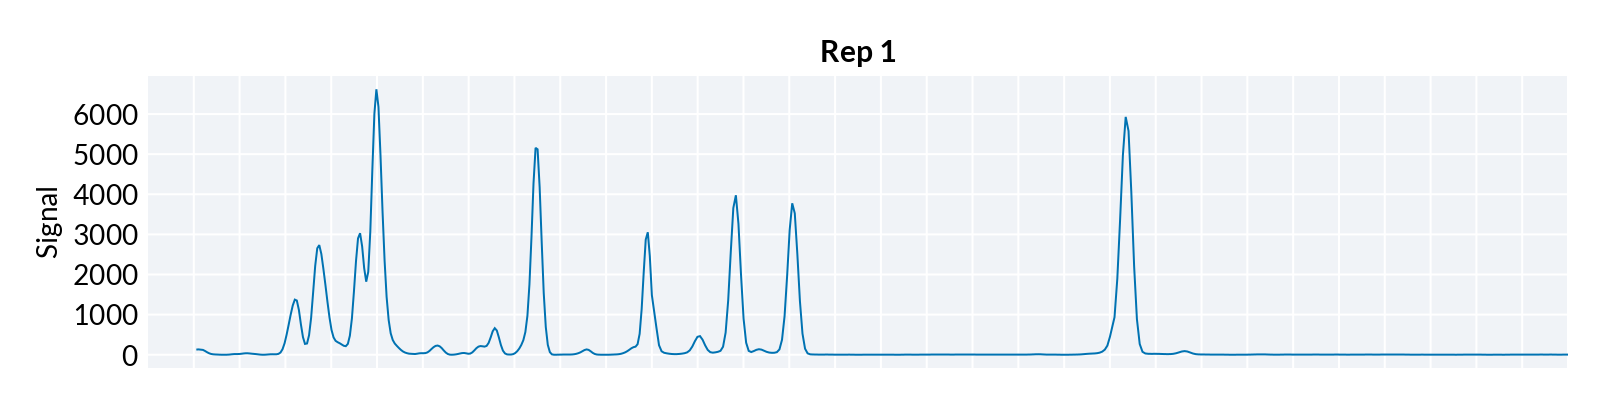

In [134]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-2_1"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [135]:
println(df_peaks[df_peaks.Well .== well1, :])

17×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ H1       SampH1     1                1  missing                           653.339   0.5000                 133      missing        1292.1        40708.7                      1286.66   missing   missing 
   2 │ H1       SampH1     2               11  0.2                               309.956   2.1199                 36       missing        1292.1

In [136]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][15, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"] |> println

MarR-2_1 - LacI/OmpR
1.2098024523722748
MarR-2_1 - CRP/OmpR
0.9910644886135236
MarR-2_1 - MarR/OmpR
1.1832594315197826


MarR-2_2
H2


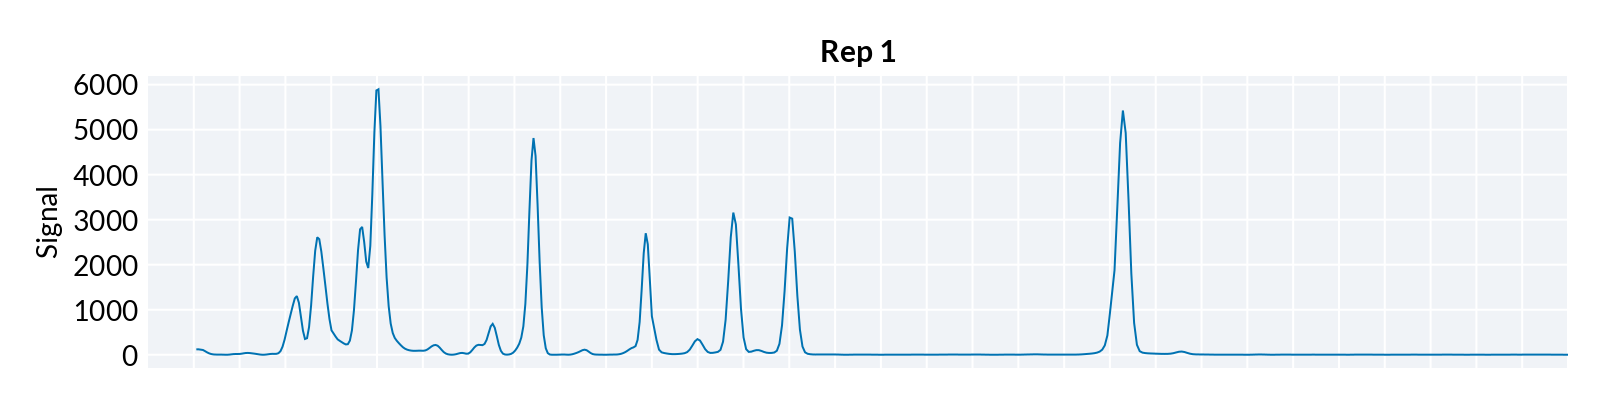

In [137]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-2_2"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [138]:
println(df_peaks[df_peaks.Well .== well1, :])

16×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L     Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64     String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ H2       SampH2     1                1  missing                           653.339   0.5000                 121      missing        1282.8        41430.9                      1286.51   missing   missing 
   2 │ H2       SampH2     2               12  0.2                               357.727   2.4466                 40       missing        1282.8

In [139]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println

MarR-2_2 - LacI/OmpR
1.1493055696783199
MarR-2_2 - CRP/OmpR
1.0793282991253947
MarR-2_2 - MarR/OmpR
1.2376534962727985


NoProt-2_1
C1


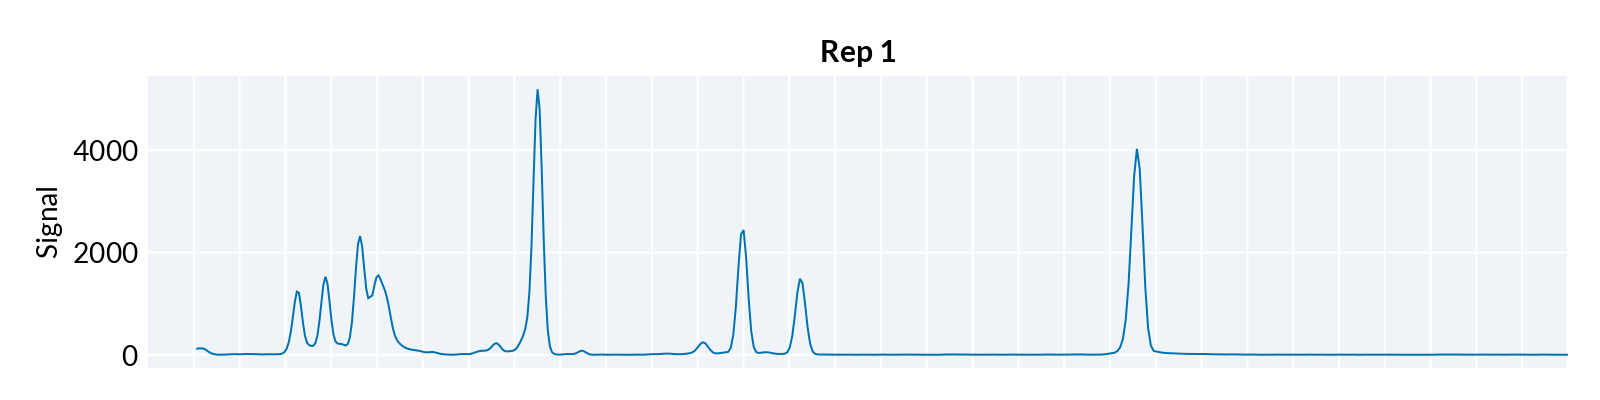

In [149]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "NoProt-2_1"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [141]:
println(df_peaks[df_peaks.Well .== well1, :])

13×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ C1       SampC1     1                1  missing                          653.339   0.5000                 125      missing       761.489        23173.1                      767.715   missing   missing 
   2 │ C1       SampC1     2               22  6.9                             3731.34    52.7167                1234     missing       761.489     

In [150]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
#println("$sample - MarR/OmpR")
#df_peaks[df_peaks.Well .== well1, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> printlnv

NoProt-2_1 - LacI/OmpR
1.70664737664805
NoProt-2_1 - CRP/OmpR
1.8601857639032473


NoProt-2_2
C2


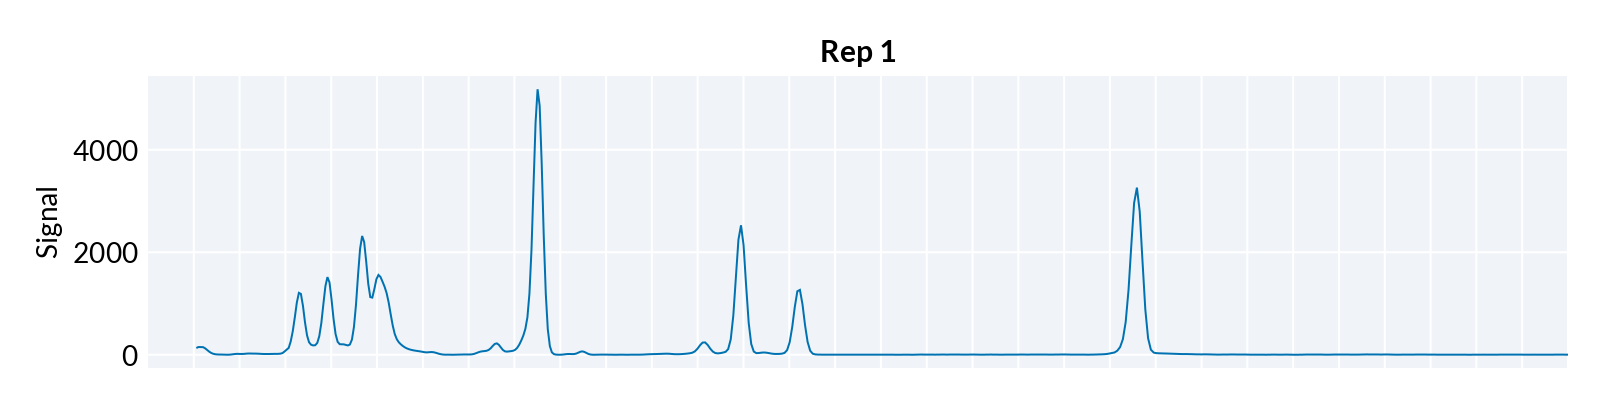

In [153]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "NoProt-2_2"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [154]:
println(df_peaks[df_peaks.Well .== well1, :])

14×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ C2       SampC2     1                1  missing                          364.246   0.5000                 150      missing       609.149        19214.0                      613.599   missing   missing 
   2 │ C2       SampC2     2               12  0.3                              242.854   1.8085                 24       missing       609.149     

In [155]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"] |> println
#println("$sample - MarR/OmpR")
#df_peaks[df_peaks.Well .== well1, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> printlnv

NoProt-2_2 - LacI/OmpR
1.5815797307496438
NoProt-2_2 - CRP/OmpR
2.1814117260501047


NoProt-2_3
C3


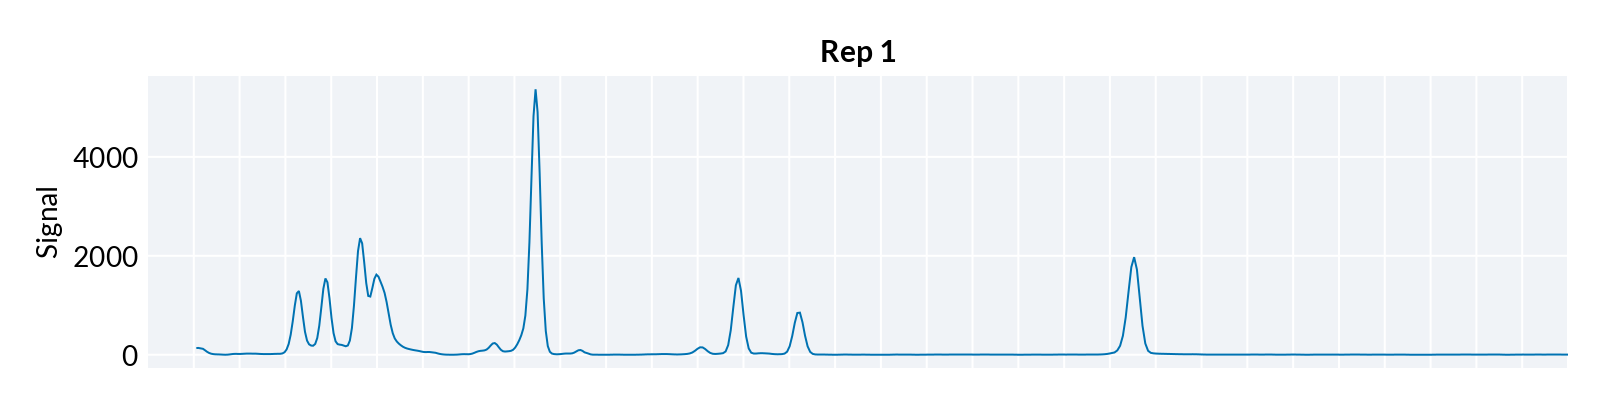

In [156]:
fig = Figure(size=(800, 200))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Rep 1", titlesize=15)
#ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="In Solution", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "NoProt-2_3"
wells = df_meta[df_meta.sample .== sample, :]

well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])



xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)

well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]
println(sample)
println(well1)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

In [157]:
println(df_peaks[df_peaks.Well .== well1, :])

13×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ C3       SampC3     1                1  missing                          653.339   0.5000                 137      missing       604.702        20607.6                      611.276   missing   missing 
   2 │ C3       SampC3     2               12  0.3                              274.411   2.0435                 23       missing       604.702     

In [158]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> println
#println("$sample - MarR/OmpR")
#df_peaks[df_peaks.Well .== well1, :][9, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][11, "nmole/L"] |> printlnv

NoProt-2_3 - LacI/OmpR
1.435766025193774
NoProt-2_3 - CRP/OmpR
1.976071809941549


### Round 2 ReDo

In [152]:
println(df_peaks[df_peaks.Well .== well1, :])

14×14 DataFrame
 Row │ Well     Sample ID  Peak ID  Size (bp)  Percent relative concentration  nmole/L    Concentration (ng/uL)  RFU      Notes     TIC (ng/uL)  TIM (nmole/L)  Total concentration (ng/uL)  Column13  Column14 
     │ String3  String7    String3  Int64      Union{Missing, String7}         Float64    String15               String7  String1?  Float64      Float64        Float64                      Missing   Missing  
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ C2       SampC2     1                1  missing                          364.246   0.5000                 150      missing       609.149        19214.0                      613.599   missing   missing 
   2 │ C2       SampC2     2               12  0.3                              242.854   1.8085                 24       missing       609.149     

In [145]:
well1 = df_meta[(df_meta.sample .== sample) .& (df_meta.primers .== "All"), :].well[1]

println("$sample - LacI/OmpR")
df_peaks[df_peaks.Well .== well1, :][12, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println
println("$sample - CRP/OmpR")
df_peaks[df_peaks.Well .== well1, :][14, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println
println("$sample - MarR/OmpR")
df_peaks[df_peaks.Well .== well1, :][10, "nmole/L"]/df_peaks[df_peaks.Well .== well1, :][13, "nmole/L"] |> println

MarR-2_3 - LacI/OmpR
1.2089251412542055
MarR-2_3 - CRP/OmpR
1.0868235658662158
MarR-2_3 - MarR/OmpR
1.3153222132603657


In [2]:
df_traces = CSV.read("../../data/bioanalyzer/2023 12 15 20H 12M Electropherogram.csv", DataFrame)
df_peaks = CSV.read("../../data/bioanalyzer/2023 12 15 20H 12M Peak Table.csv", DataFrame)


df_samples = CSV.read("../../data/bioanalyzer/20231215 Samples.csv", DataFrame)
df_samples = rename(stack(df_samples, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Dict("value" => "sample"))
insertcols!(df_samples, 1, :well => df_samples.Column1 .* df_samples.variable)
df_samples = df_samples[!, [:well, :sample]]

df_primers = CSV.read("../../data/bioanalyzer/20231215 Primers.csv", DataFrame)
df_primers = rename(stack(df_primers, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]), Dict("value" => "primers"))
insertcols!(df_primers, 1, :well => df_primers.Column1 .* df_primers.variable)
df_primers = df_primers[!, [:well, :primers]]

df_meta = innerjoin(df_samples, df_primers, on=:well);
empty_wells = df_meta[df_meta.sample .== "x", :well]
df_peaks = df_peaks[map(x -> x ∉ empty_wells, df_peaks.Well), :]
df_peaks[!, "Size (bp)"] = parse.(Int64, df_peaks[!, "Size (bp)"])
df_peaks[!, "nmole/L"] = parse.(Float64, df_peaks[!, "nmole/L"])

296-element Vector{Float64}:
 3166.5613
  140.8259
  154.4333
    1.2131
    0.4429
  252.5125
  132.3964
  151.9667
    1.5015
    0.485
    ⋮
   17.2283
  126.3615
    3.5742
   64.3308
   13.0332
   88.4349
   89.5324
   19.6199
    0.0345

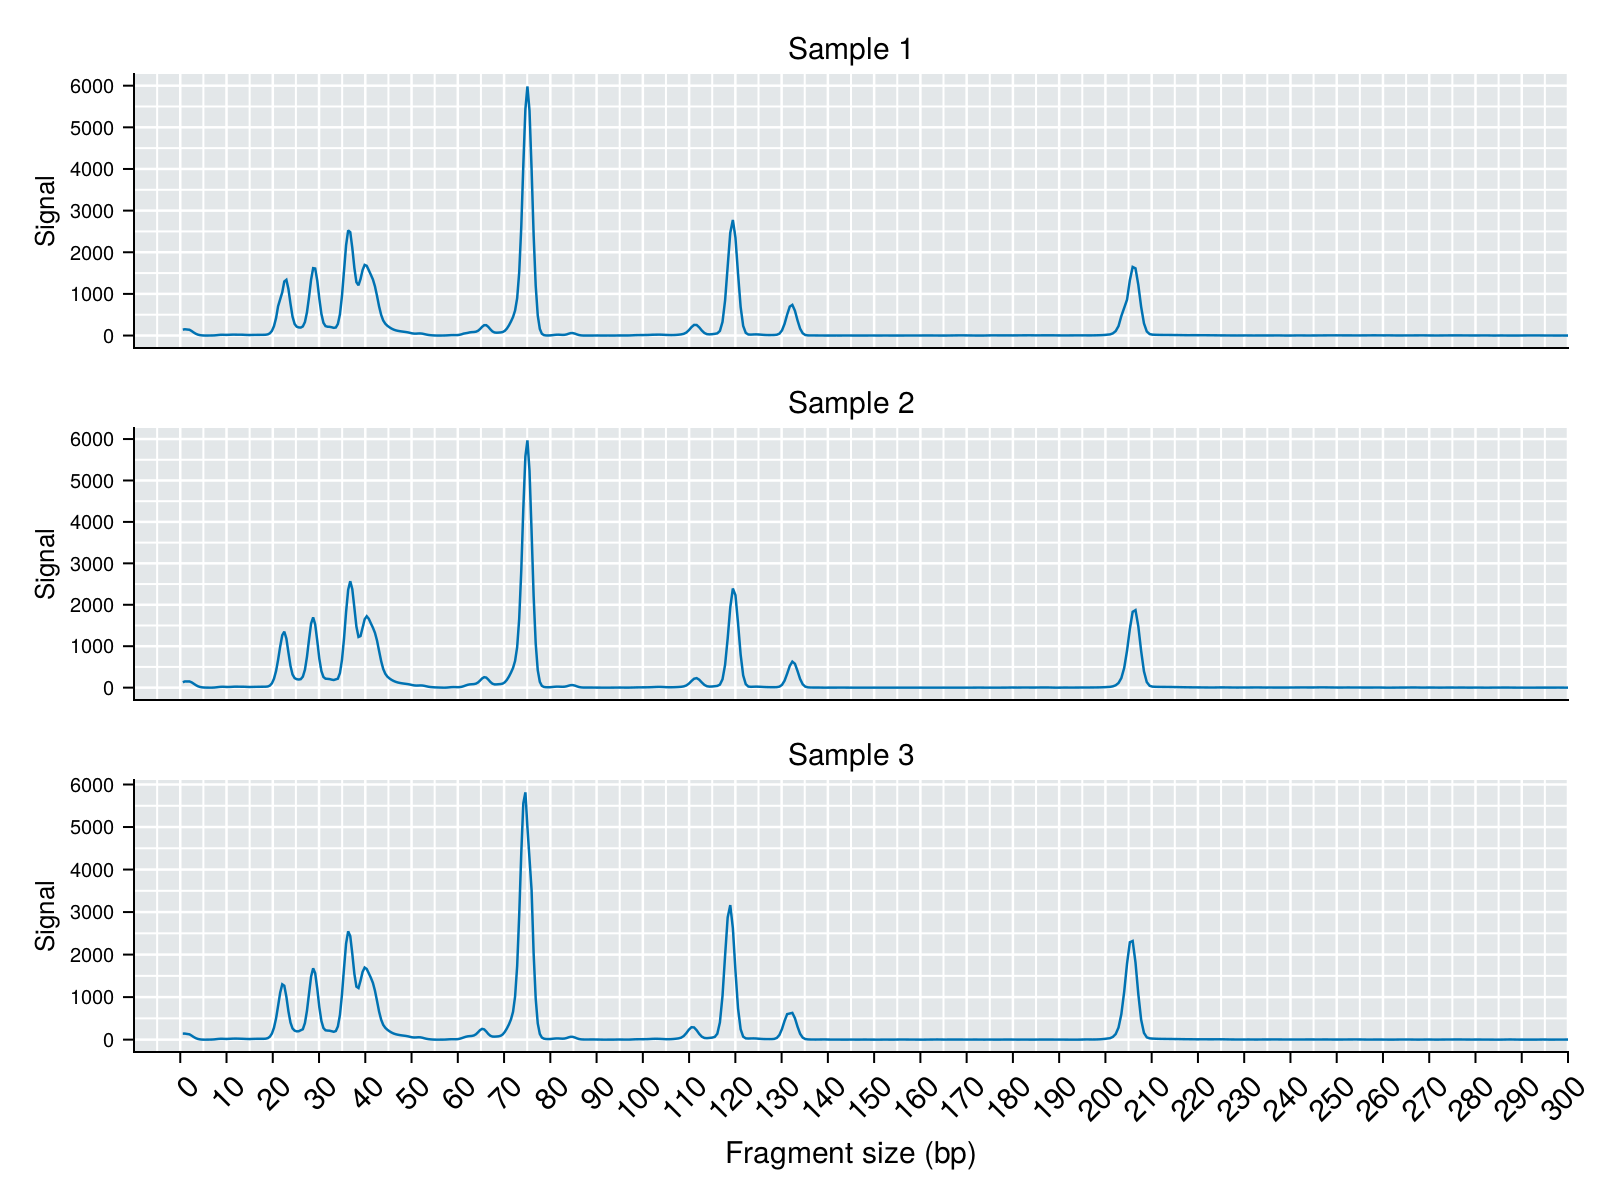

In [4]:
sample = "LacI-2_1"

wells = df_meta[df_meta.sample .== sample, :]


fig = Figure(size=(800, 600))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Sample 1", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Sample 2", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="Sample 3", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "LacI-2_1"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "LacI-2_2"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "LacI-2_3"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
#xlims!(ax4, -10, 300)
#xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

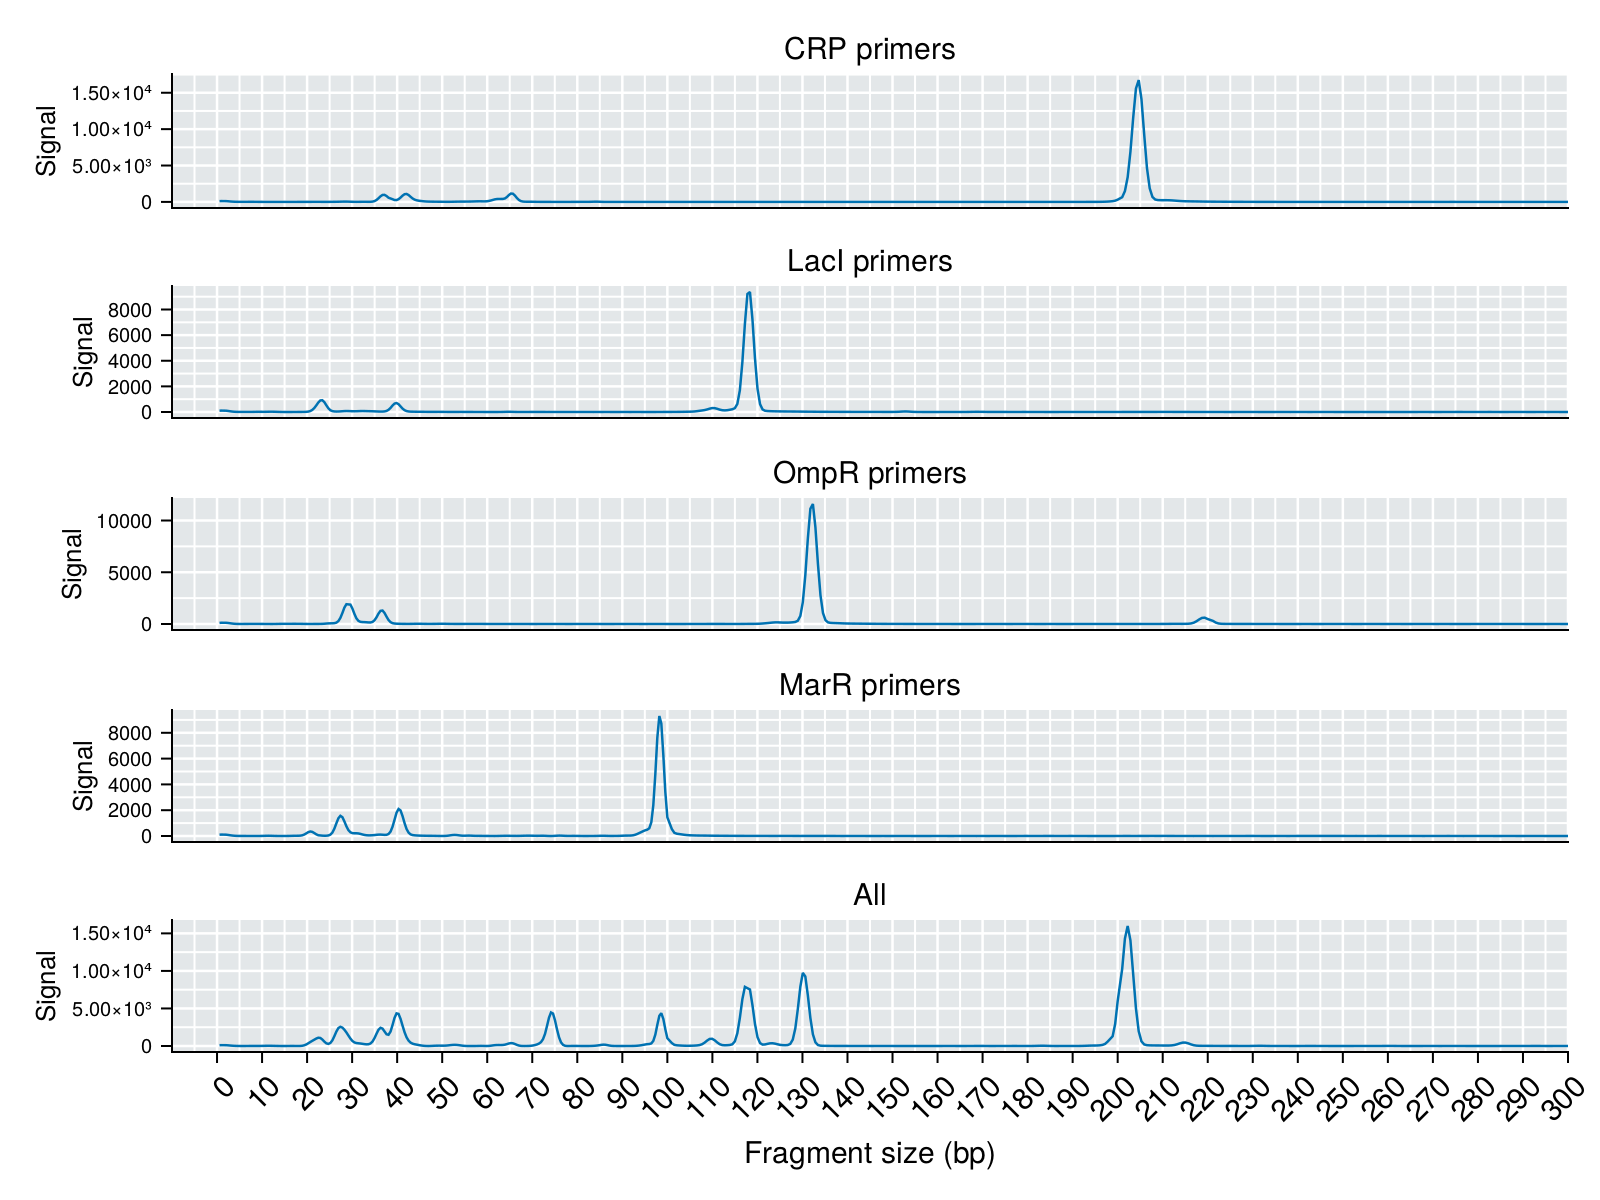

In [5]:
sample = "N4"

wells = df_meta[df_meta.sample .== sample, :]


fig = Figure(size=(800, 600))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="CRP primers", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="LacI primers", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="OmpR primers", titlesize=15)
ax4 = Axis(g0[4, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="MarR primers", titlesize=15)
ax5 = Axis(g0[5, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="All", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)


well = wells[wells.primers .== "CRP", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "LacI", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "OmpR", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "MarR", :well][1]
lines!(ax4, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
well = wells[wells.primers .== "All", :well][1]
lines!(ax5, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
xlims!(ax4, -10, 300)
xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

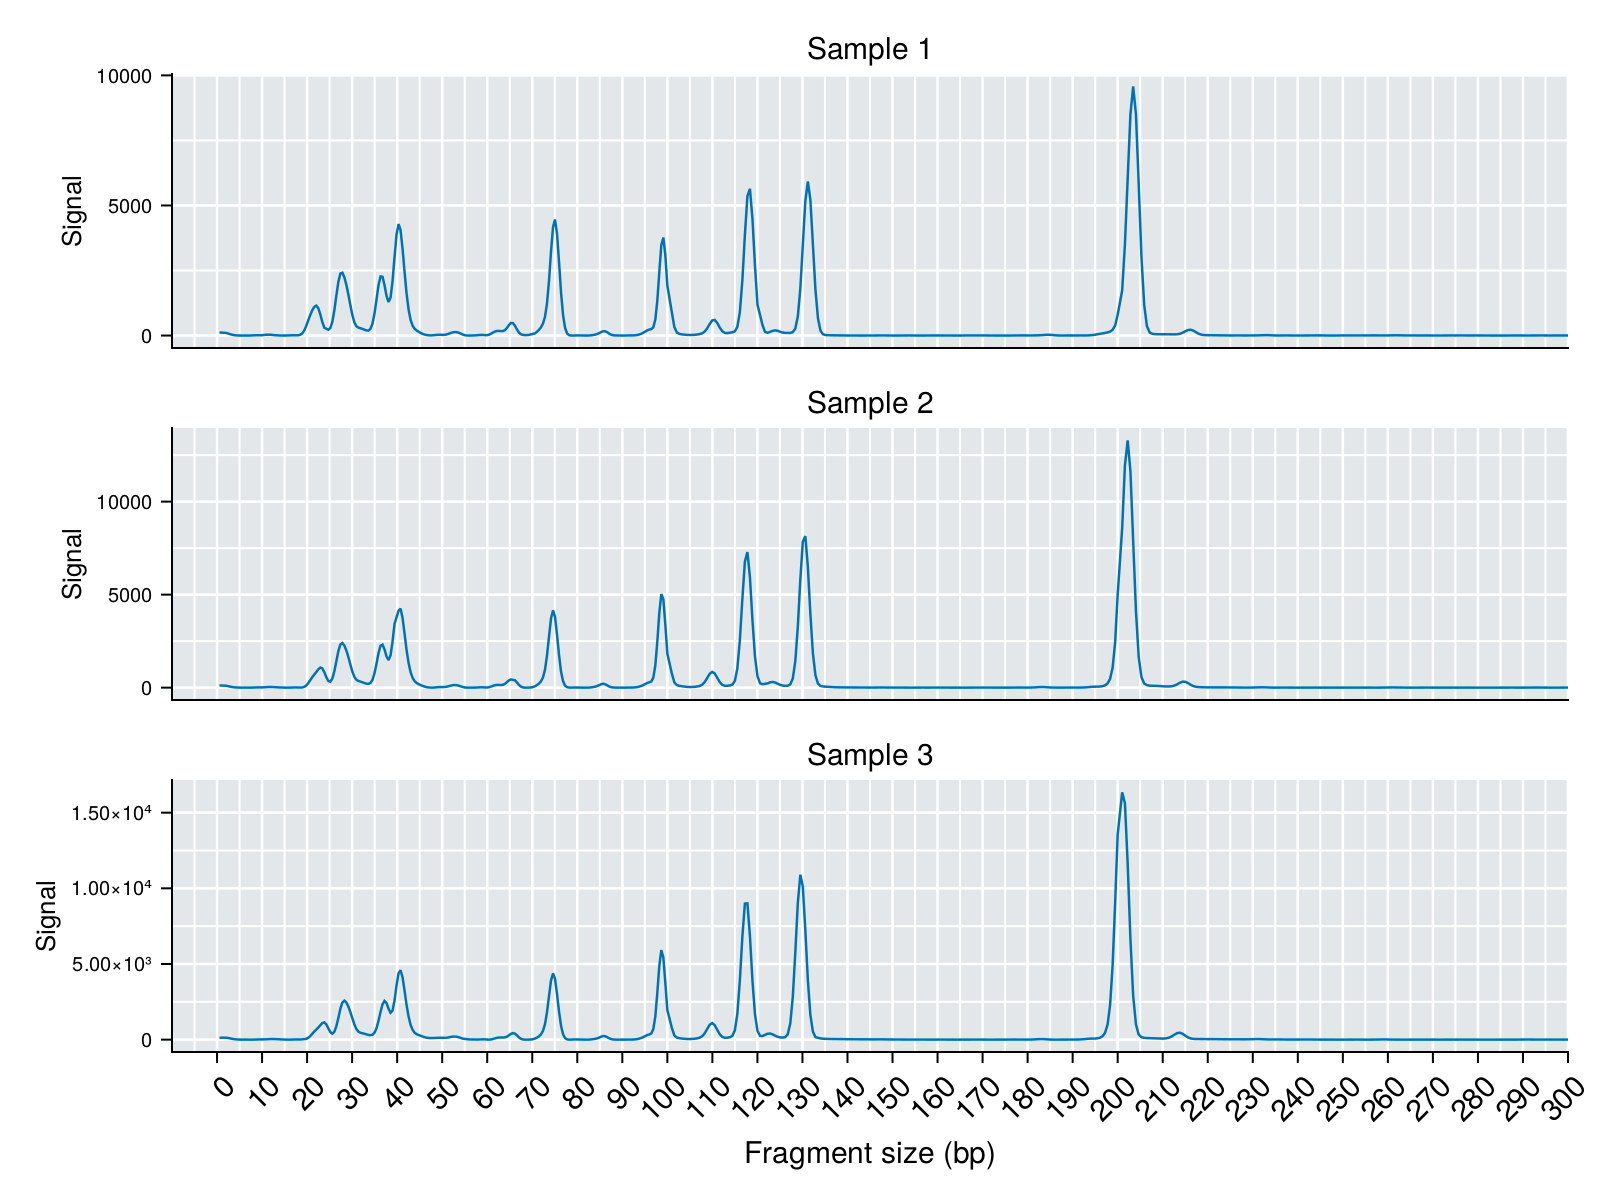

In [7]:
fig = Figure(size=(800, 600))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Sample 1", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Sample 2", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="Sample 3", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-1_1"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "MarR-1_2"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "MarR-1_3"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
#xlims!(ax4, -10, 300)
#xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig

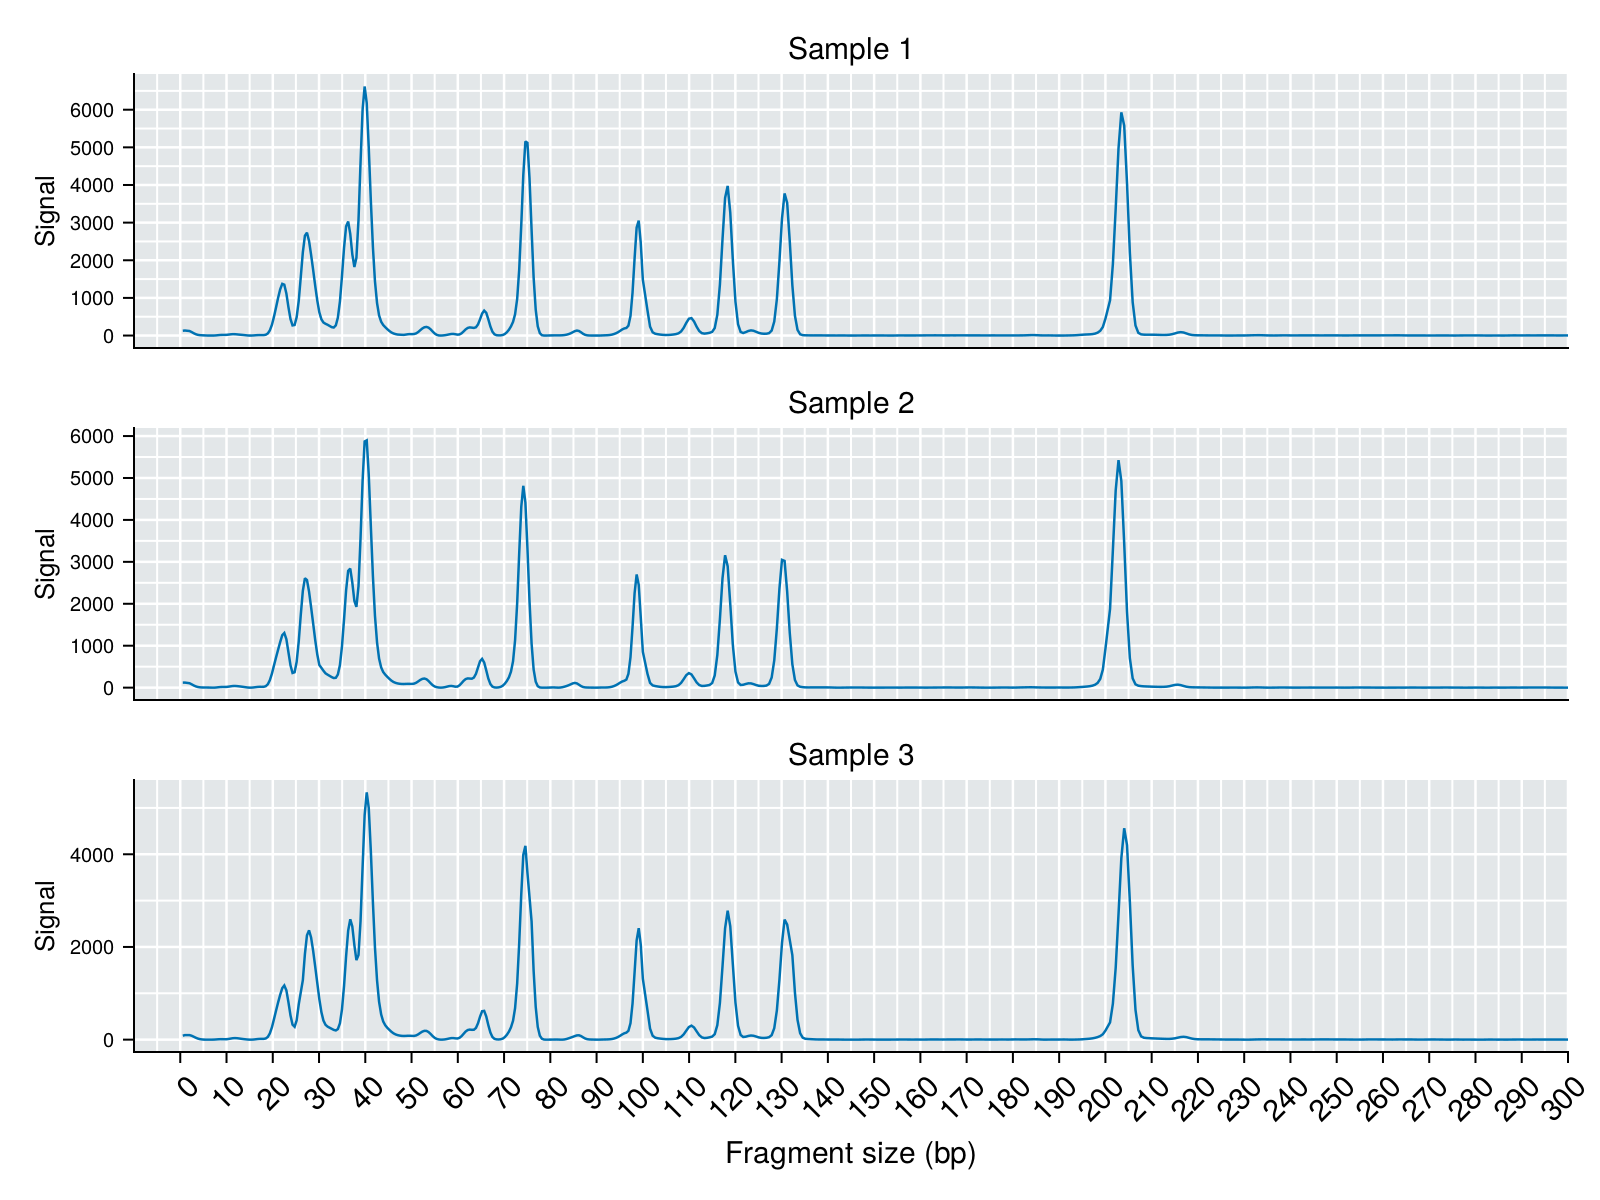

In [8]:
fig = Figure(size=(800, 600))
g0 = fig[1, 1] = GridLayout()
ax1 = Axis(g0[1, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Sample 1", titlesize=15)
ax2 = Axis(g0[2, 1], xticks=(0:10:300), ylabel="Signal", xticksize=0, xticklabelsize=0, title="Sample 2", titlesize=15)
ax3 = Axis(g0[3, 1], xticks=(0:10:300), ylabel="Signal", xlabel="Fragment size (bp)", title="Sample 3", xticklabelsize=15, xticklabelrotation=π/4, xlabelsize=15, titlesize=15)

sample = "MarR-2_1"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax1, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "MarR-2_2"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax2, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])
sample = "MarR-2_3"
wells = df_meta[df_meta.sample .== sample, :]
well = wells[wells.primers .== "All", :well][1]
lines!(ax3, df_traces[!, "Size (bp)"], df_traces[!, "$well: Samp$well"])

xlims!(ax1, -10, 300)
xlims!(ax2, -10, 300)
xlims!(ax3, -10, 300)
#xlims!(ax4, -10, 300)
#xlims!(ax5, -10, 300)
#rowgap!(g0, 0)
#save("20231214_fragment_analyer_primer_base.pdf", fig)
fig